## Analyzing Airbnb Listings in San Francisco 

The objective of this analysis is to work with the data collected from Airbnb and analyze and learn about Airbnb listings, whether Airbnb hosts operate as single or multi-home managers, identify locations in which Airbnb listings are concentrated, which listings compete with each other, etc.

# 0. Workflow and preliminaries

Organizing the workflow by creating a directory dedicated to this problem set. Inside this directory, create directories called `RawData`, `ProcessedData`, `Code`, and `Figures`. You will store the data you get from the Internet in the `RawData` directory. Intermediate and final datasets created by you will go to `ProcessedData`. The code you write will be saved to `Code` and the figures you produced will be saved to `Figures`. However, you will turn in your Jupyter Notebook so make sure that all the output is both displayed on the notebook and saved to the relevant directories.

## 1. Learning about the data

Go to http://insideairbnb.com/:

- Visit the entire website. Make sure you check every page in the website, read about the motivation that led to the creation of the website, the policies related to data access and management, etc.
- Go to `Data` and to `Get the data`. You will see that there are many datasets from many different cities.


## 2. Examining the data

I'm going to be vague here but there are several things you should do. Doing these, however, is the bare minimum and will ensure you get 60 percent of the points of this section. You should think carefully about other statistics that may be of interest.

- Import modules that we normaly used during the course. Examples of these include Pandas, Numpy, Folium, Seaborn, etc.
- Load the data to your notebook.
- Recognize which variables are numeric, which ones are strings, which ones are such that could be considered boolean, etc. You don't need to tell me which variables are what but you do need to make sure that when we work with some of these variables, these have the correct format.
- We will restrict the analysis to the following variables: `id`, `name`,`host_id`,`host_since`, `host_location`,`host_acceptance_rate`,`host_is_superhost`, `host_neighbourhood`, `neighbourhood_cleansed`,`latitude`,`longitude`, `property_type`, `room_type`, `accommodates`, `bathrooms`,`bedrooms`, `beds`, `price`,`minimum_nights`, `maximum_nights`, `number_of_reviews`, `review_scores_rating`, `review_scores_accuracy`, `review_scores_communication`, `review_scores_location`, `review_scores_value`. Therefore, make sure you drop all other columns. **If these covariates do not exist for the city you chose, choose a different city!**
- How many listings are there?
- How many hosts?
- What is the average number of reviews per listing? The average rating per listing?
- Provide a table with summary statistics (e.g., mean, median, standard deviation, minimum, maximum) for \text{all} the variables for which this analysis is relevant. If you learn that some variables are not useful, drop them from the dataframe.
- Produce the same correlation matrix plot we did in the ML module for the numeric variables that correspond to characteristics of the listings, but exclude `review_scores_accuracy`, `review_scores_communication`, `review_scores_location`, `review_scores_value`, `minimum_nights`, `maximum_nights`.
- You will find that some variables, such as price, have incredibly low and incredibly large values. Restrict the analysis, from now on, to listings of the type  


# 2.1. Import modules and read the data

In [1]:
# In this cell, import all the relevant modules
import pandas as pd
import numpy as np
import re 
import random
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import math
from IPython.display import Image
import getpass

In [2]:
user = getpass.getuser()
user

'aimanmalik'

In [3]:
# In this cell, define the relevant paths
RawData = '/Users/' + user + '/Downloads/Econ489/Problem_Set_5/RawData/'
Code = '/Users/' + user + '/Downloads/Econ489/Problem_Set_5/Code/'
ProcessedData = '/Users/' + user + '/Downloads/Econ489/Problem_Set_5/ProcessedData/'
Figures = '/Users/'+ user + '/Downloads/Econ489/Problem_Set_5/Figures /'

In [4]:
# In this cell, define the name of the file you will import
SanFran_listings = "listings.csv" 

In [5]:
# In this cell, read in the data
df = pd.read_csv(RawData + SanFran_listings)
df

id                            listing_url       scrape_id  \
0          958       https://www.airbnb.com/rooms/958  20220907064650   
1         5858      https://www.airbnb.com/rooms/5858  20220907064650   
2         8014      https://www.airbnb.com/rooms/8014  20220907064650   
3       148627    https://www.airbnb.com/rooms/148627  20220907064650   
4       494111    https://www.airbnb.com/rooms/494111  20220907064650   
...        ...                                    ...             ...   
6624  27232655  https://www.airbnb.com/rooms/27232655  20220907064650   
6625  13926812  https://www.airbnb.com/rooms/13926812  20220907064650   
6626  29311755  https://www.airbnb.com/rooms/29311755  20220907064650   
6627  13935443  https://www.airbnb.com/rooms/13935443  20220907064650   
6628  34681471  https://www.airbnb.com/rooms/34681471  20220907064650   

     last_scraped           source  \
0      2022-09-07      city scrape   
1      2022-09-07      city scrape   
2      2022-09-07  previous scrape   
3      2022-09-07      city scrape   
4      2022-09-07      city scrape   
...           ...              ...   
6624   2022-09-07  previous scrape   
6625   2022-09-07  previous scrape   
6626   2022-09-07  previous scrape   
6627   2022-09-07      city scrape   
6628   2022-09-07  previous scrape   

                                                   name  \
0                 Bright, Modern Garden Unit - 1BR/1BTH   
1                                    Creative Sanctuary   
2               room in FEMALE house WIFI market nearby   
3                         Romantic Marina Garden Studio   
4                   Comfortable space of your own in SF   
...                                                 ...   
6624     Lovely Apartment in a Convenient Area / Unit A   
6625           (Garden) Private room_few blocks from SF   
6626                      Daly City-Monthly Rental Only   
6627    ( Bay) Private Suite W/ bath_few blocks from SF   
6628  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   

                                            description  \
0     Please check local laws re Covid before you re...   
1     We live in a large Victorian house on a quiet ...   
2     Room is on the second floor so it gets a good ...   
3     Street parking only, please follow all signs.<...   
4     <b>The space</b><br />A beautiful, bright, and...   
...                                                 ...   
6624  Unit A on Ground Floor<br />This unit is perfe...   
6625  We are couple blocks from SF, enjoy in quiet a...   
6626  Located in the delightfully foggy hills of Dal...   
6627  We are couple blocks from SF, enjoy in quiet a...   
6628  The Hill View Suite is a quiet getaway w/ brea...   

                                  neighborhood_overview  \
0     Quiet cul de sac in friendly neighborhood<br /...   
1     I love how our neighborhood feels quiet but is...   
2     The neighborhood is very residential, close to...   
3     Super convenient walking access to all the bes...   
4     The location is not considered a traditionally...   
...                                                 ...   
6624  Our unit is at the Border of San Francisco, ne...   
6625  Walking distance to Walgreens, mini markets, r...   
6626  A quiet residential neighborhood. It is overcr...   
6627  Walking distance to Walgreens, mini markets, r...   
6628  1. Residential area.<br />2. Very quiet, clean...   

                                            picture_url    host_id  ...  \
0     https://a0.muscache.com/pictures/b7c2a199-4c17...       1169  ...   
1     https://a0.muscache.com/pictures/17714/3a7aea1...       8904  ...   
2     https://a0.muscache.com/pictures/2cc1fc3d-0ae0...      22402  ...   
3     https://a0.muscache.com/pictures/3048720/ef73f...     709325  ...   
4     https://a0.muscache.com/pictures/a4c0e7ec-caa1...     252927  ...   
...                                                 ...        ...  ...   
6624  https://a0.muscache.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6629 non-null   int64  
 1   listing_url                                   6629 non-null   object 
 2   scrape_id                                     6629 non-null   int64  
 3   last_scraped                                  6629 non-null   object 
 4   source                                        6629 non-null   object 
 5   name                                          6629 non-null   object 
 6   description                                   6577 non-null   object 
 7   neighborhood_overview                         4700 non-null   object 
 8   picture_url                                   6629 non-null   object 
 9   host_id                                       6629 non-null   i

# 2.2 Clean the data

We will restrict attention to only some variables. We'll drop variables that have too many missing values. 

In [7]:
# In this cell restrict the dataframe to the columns identified above.
df= df[['id', 'name','host_id','host_since', 'host_location','host_acceptance_rate','host_is_superhost', 'host_neighbourhood', 'neighbourhood_cleansed','latitude','longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'price','minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6626  29311755                      Daly City-Monthly Rental Only   41303323   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

      host_since      host_location host_acceptance_rate host_is_superhost  \
0     2008-07-31  San Francisco, CA                  98%                 t   
1     2009-03-02  San Francisco, CA                  70%                 f   
2     2009-06-20  San Francisco, CA                  90%                 f   
3     2011-06-16  San Francisco, CA                 100%                 f   
4     2010-10-04  San Francisco, CA                  87%                 t   
...          ...                ...                  ...               ...   
6624  2018-07-08  San Francisco, CA                  60%                 f   
6625  2016-07-09  San Francisco, CA                  99%                 t   
6626  2015-08-12       San Jose, CA                 100%                 t   
6627  2016-07-09  San Francisco, CA                  99%                 t   
6628  2019-05-13  San Francisco, CA                   0%                 f   

                 host_neighbourhood neighbourhood_cleansed  latitude  ...  \
0                   Duboce Triangle       Western Addition  37.77028  ...   
1                    Bernal Heights         Bernal Heights  37.74474  ...   
2                         Sunnyside          Outer Mission  37.73077  ...   
3                   Diamond Heights                 Marina  37.79961  ...   
4                    Outer Richmond         Outer Richmond  37.77988  ...   
...                             ...                    ...       ...  ...   
6624                      Daly City             Ocean View  37.70141  ...   
6625                      Daly City         Crocker Amazon  37.70684  ...   
6626  Five Wounds/Brookwood Terrace             Ocean View  37.70684  ...   
6627                      Daly City         Crocker Amazon  37.70549  ...   
6628                      Daly City         Crocker Amazon  37.70590  ...   

      beds    price minimum_nights  maximum_nights  number_of_reviews  \
0      2.0  $180.00              2              30                358   
1      2.0  $235.00             30              60                111   
2      1.0   $61.00              2              50                 86   
3      1.0   $85.00             30             120                116   
4      2.0  $146.00              3              90                211   
...    ...      ...            ...             ...                ...   
6624   4.0  $108.00             30             180                174   
6625   1.0   $47.00             30            1125                177   
6626   4.0  $191.00             31              90                163   
6627   1.0   $65.00              1              25                443   
6628   2.0  $138.00              2              30                 54   

      review_scores_rating  review_scores_accuracy  \
0                     4.86                    4.93   
1                     4.88                    4.85   
2                     4.75                    4.73   
3                     4.29                    4.55   
4                     4.65                

In [8]:
df.isna().mean()

id                             0.000000
name                           0.000000
host_id                        0.000000
host_since                     0.001810
host_location                  0.159602
host_acceptance_rate           0.102429
host_is_superhost              0.001056
host_neighbourhood             0.058983
neighbourhood_cleansed         0.000000
latitude                       0.000000
longitude                      0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bathrooms                      1.000000
bedrooms                       0.133353
beds                           0.020968
price                          0.000000
minimum_nights                 0.000000
maximum_nights                 0.000000
number_of_reviews              0.000000
review_scores_rating           0.166994
review_scores_accuracy         0.170312
review_scores_communication    0.170312
review_scores_location         0.170463


In [9]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_since                       12
host_location                  1058
host_acceptance_rate            679
host_is_superhost                 7
host_neighbourhood              391
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                      6629
bedrooms                        884
beds                            139
price                             0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating           1107
review_scores_accuracy         1129
review_scores_communication    1129
review_scores_location         1130
review_scores_value            1130
dtype: int64

In [10]:
df.sort_values(by=['id'])

id                                               name  \
0                    958              Bright, Modern Garden Unit - 1BR/1BTH   
1                   5858                                 Creative Sanctuary   
2                   8014            room in FEMALE house WIFI market nearby   
5                   8142  Friendly Room Apt. Style -UCSF/USF - San Franc...   
7                   8339                    Historic Alamo Square Victorian   
...                  ...                                                ...   
6451  708117272882599950          Luxury 3 bedroom apartment in City Center   
6452  708160521937342369        Luxury 2 bedroom 2 bathrooms in city center   
6294  708197577414068763           Lavish Lodging in a Laidback City Locale   
6310  708236565294757134        Lovely 3 bedroom 2.5 bath condo with garage   
6311  708431156156100676                   Spacious Hayes Valley Apartment.   

       host_id  host_since      host_location host_acceptance_rate  \
0         1169  2008-07-31  San Francisco, CA                  98%   
1         8904  2009-03-02  San Francisco, CA                  70%   
2        22402  2009-06-20  San Francisco, CA                  90%   
5        21994  2009-06-17  San Francisco, CA                  73%   
7        24215  2009-07-02  San Francisco, CA                   0%   
...        ...         ...                ...                  ...   
6451    236978  2010-09-16  San Francisco, CA                  98%   
6452    236978  2010-09-16  San Francisco, CA                  98%   
6294  33856710  2015-05-20  San Francisco, CA                 100%   
6310   3956811  2012-10-23  San Francisco, CA                  NaN   
6311   9632192  2013-10-25                NaN                  87%   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    f          Sunnyside          Outer Mission  37.730770   
5                    f        Cole Valley         Haight Ashbury  37.765550   
7                    f       Alamo Square       Western Addition  37.775640   
...                ...                ...                    ...        ...   
6451                 t   Mission District                Mission  37.762125   
6452                 t   Mission District                Mission  37.762244   
6294                 t          Sunnyside          Outer Mission  37.731700   
6310                 f     Cathedral Hill       Western Addition  37.781666   
6311                 t         The Castro       Western Addition  37.772742   

      ...  beds    price minimum_nights  maximum_nights  number_of_reviews  \
0     ...   2.0  $180.00              2              30                358   
1     ...   2.0  $235.00             30              60                111   
2     ...   1.0   $61.00              2              50                 86   
5     ...   1.0   $56.00             32              90                  8   
7     ...   2.0  $895.00              7             111                 28   
...   ...   ...      ...            ...             ...                ...   
6451  ...   3.0  $379.00              3             365                  0   
6452  ...   NaN  $359.00              3               3                  0   
6294  ...   5.0  $496.00              3            1125                  0   
6310  ...   4.0  $250.00             30             365                  0   
6311  ...   1.0  $110.00             30             365                  0   

      review_scores_rating  review_scores_accuracy  \
0                     4.86                    4.93   
1                     4.88                    4.85   
2                     4.75                    4.73   
5                     4.63                    4.38   
7                     4.87                    4.88   
...                   

In [11]:
df=df.drop_duplicates(subset='id', keep='first').reset_index(drop=True)
df

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6626  29311755                      Daly City-Monthly Rental Only   41303323   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

      host_since      host_location host_acceptance_rate host_is_superhost  \
0     2008-07-31  San Francisco, CA                  98%                 t   
1     2009-03-02  San Francisco, CA                  70%                 f   
2     2009-06-20  San Francisco, CA                  90%                 f   
3     2011-06-16  San Francisco, CA                 100%                 f   
4     2010-10-04  San Francisco, CA                  87%                 t   
...          ...                ...                  ...               ...   
6624  2018-07-08  San Francisco, CA                  60%                 f   
6625  2016-07-09  San Francisco, CA                  99%                 t   
6626  2015-08-12       San Jose, CA                 100%                 t   
6627  2016-07-09  San Francisco, CA                  99%                 t   
6628  2019-05-13  San Francisco, CA                   0%                 f   

                 host_neighbourhood neighbourhood_cleansed  latitude  ...  \
0                   Duboce Triangle       Western Addition  37.77028  ...   
1                    Bernal Heights         Bernal Heights  37.74474  ...   
2                         Sunnyside          Outer Mission  37.73077  ...   
3                   Diamond Heights                 Marina  37.79961  ...   
4                    Outer Richmond         Outer Richmond  37.77988  ...   
...                             ...                    ...       ...  ...   
6624                      Daly City             Ocean View  37.70141  ...   
6625                      Daly City         Crocker Amazon  37.70684  ...   
6626  Five Wounds/Brookwood Terrace             Ocean View  37.70684  ...   
6627                      Daly City         Crocker Amazon  37.70549  ...   
6628                      Daly City         Crocker Amazon  37.70590  ...   

      beds    price minimum_nights  maximum_nights  number_of_reviews  \
0      2.0  $180.00              2              30                358   
1      2.0  $235.00             30              60                111   
2      1.0   $61.00              2              50                 86   
3      1.0   $85.00             30             120                116   
4      2.0  $146.00              3              90                211   
...    ...      ...            ...             ...                ...   
6624   4.0  $108.00             30             180                174   
6625   1.0   $47.00             30            1125                177   
6626   4.0  $191.00             31              90                163   
6627   1.0   $65.00              1              25                443   
6628   2.0  $138.00              2              30                 54   

      review_scores_rating  review_scores_accuracy  \
0                     4.86                    4.93   
1                     4.88                    4.85   
2                     4.75                    4.73   
3                     4.29                    4.55   
4                     4.65                

In [12]:
#Since we are only interested in host locations that are in San Francisco.
df = df.loc[df['host_location']=='San Francisco, CA']
df

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6620  15658593   Small house+golf⛳️view+privateBath+super private  100935130   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

      host_since      host_location host_acceptance_rate host_is_superhost  \
0     2008-07-31  San Francisco, CA                  98%                 t   
1     2009-03-02  San Francisco, CA                  70%                 f   
2     2009-06-20  San Francisco, CA                  90%                 f   
3     2011-06-16  San Francisco, CA                 100%                 f   
4     2010-10-04  San Francisco, CA                  87%                 t   
...          ...                ...                  ...               ...   
6620  2016-10-23  San Francisco, CA                  99%                 t   
6624  2018-07-08  San Francisco, CA                  60%                 f   
6625  2016-07-09  San Francisco, CA                  99%                 t   
6627  2016-07-09  San Francisco, CA                  99%                 t   
6628  2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  beds    price  \
0       Duboce Triangle       Western Addition  37.77028  ...   2.0  $180.00   
1        Bernal Heights         Bernal Heights  37.74474  ...   2.0  $235.00   
2             Sunnyside          Outer Mission  37.73077  ...   1.0   $61.00   
3       Diamond Heights                 Marina  37.79961  ...   1.0   $85.00   
4        Outer Richmond         Outer Richmond  37.77988  ...   2.0  $146.00   
...                 ...                    ...       ...  ...   ...      ...   
6620                NaN              Lakeshore  37.69522  ...   1.0  $106.00   
6624          Daly City             Ocean View  37.70141  ...   4.0  $108.00   
6625          Daly City         Crocker Amazon  37.70684  ...   1.0   $47.00   
6627          Daly City         Crocker Amazon  37.70549  ...   1.0   $65.00   
6628          Daly City         Crocker Amazon  37.70590  ...   2.0  $138.00   

     minimum_nights  maximum_nights  number_of_reviews  review_scores_rating  \
0                 2              30                358                  4.86   
1                30              60                111                  4.88   
2                 2              50                 86                  4.75   
3                30             120                116                  4.29   
4                 3              90                211                  4.65   
...             ...             ...                ...                   ...   
6620              1            1125                 89                  4.59   
6624             30             180                174                  4.66   
6625             30            1125                177                  4.95   
6627              1              25                443                  4.96   
6628              2              30                 54                  4.94   

      review_scores_accuracy review_scores_communication  \
0                       4.93                        4.88   
1                       4.85                        4.85   
2           

# 2.3. Examining the data

How many listings are there? How many hosts? Are all variables in the correct format?

In [13]:
# How many listings are there?
df.shape[0]

4474

In [14]:
# How many hosts?
df['host_id'].unique()

array([     1169,      8904,     22402, ...,   7968430,  82722582,
       261616147])

In [15]:
# Summary statistics of _relevant_ variables. Remember to first check that each relevant variable has the right format/is of the right type. Modify the variables if needed.
df.dtypes

id                               int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_acceptance_rate            object
host_is_superhost               object
host_neighbourhood              object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [16]:
df["host_since"] = pd.to_datetime(df["host_since"])

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3004599045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_since"] = pd.to_datetime(df["host_since"])


In [17]:
df.describe().round(4)

id       host_id   latitude  longitude  accommodates  \
count  4.474000e+03  4.474000e+03  4474.0000  4474.0000     4474.0000   
mean   6.675537e+16  7.430549e+07    37.7630  -122.4345        3.2392   
std    1.940735e+17  1.081807e+08     0.0248     0.0282        2.0515   
min    9.580000e+02  1.169000e+03    37.6922  -122.5125        1.0000   
25%    1.143736e+07  4.144121e+06    37.7469  -122.4491        2.0000   
50%    2.961368e+07  1.922344e+07    37.7643  -122.4294        2.0000   
75%    4.800487e+07  1.025231e+08    37.7824  -122.4134        4.0000   
max    7.082366e+17  4.747283e+08    37.8095  -122.3585       16.0000   

       bathrooms   bedrooms       beds  minimum_nights  maximum_nights  \
count        0.0  4116.0000  4387.0000       4474.0000       4474.0000   
mean         NaN     1.5802     1.8582         24.8257        672.3871   
std          NaN     0.9120     1.2568         58.3045      14952.1227   
min          NaN     1.0000     1.0000          1.0000          1.0000   
25%          NaN     1.0000     1.0000          2.0000         29.0000   
50%          NaN     1.0000     1.0000          5.0000        180.0000   
75%          NaN     2.0000     2.0000         30.0000       1125.0000   
max          NaN     8.0000    16.0000       1125.0000     999999.0000   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
count          4474.0000             3970.0000               3955.0000   
mean             64.8502                4.7776                  4.8353   
std             104.3105                0.4438                  0.3368   
min               0.0000                0.0000                  0.0000   
25%               3.0000                4.7400                  4.8100   
50%              18.0000                4.9000                  4.9300   
75%              80.7500                5.0000                  5.0000   
max             960.0000                5.0000                  5.0000   

       review_scores_communication  review_scores_location  \
count                    3955.0000               3954.0000   
mean                        4.8765                  4.8061   
std                         0.3159                  0.3268   
min                         1.0000                  0.0000   
25%                         4.8800                  4.7600   
50%                         4.9700                  4.8900   
75%                         5.0000                  5.0000   
max                         5.0000                  5.0000   

       review_scores_value  
count            3954.0000  
mean                4.6926  
std                 0.3785  
min                 0.0000  
25%                 4.6200  
50%                 4.7700  
75%                 4.8900  
max                 5.0000

In [18]:
df.dtypes

id                                      int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_acceptance_rate                   object
host_is_superhost                      object
host_neighbourhood                     object
neighbourhood_cleansed                 object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bathrooms                             float64
bedrooms                              float64
beds                                  float64
price                                  object
minimum_nights                          int64
maximum_nights                          int64
number_of_reviews                       int64
review_scores_rating              

There are some columns we may want to transform to numeric format. For example, `price`, `host_acceptance_rate`, and `host_is_superhost` appear to be in a wrong format. Price, for example, is stored as strings (at least is not a mixed type variable!). We need to clean it and make it a numeric variable.

In [19]:
# Create a new variable called `df['price2']` that is equal to `price` but of the right type and with the right format.
df["price2"]= df["price"].str.replace('[\$\,]|\.\d*', '').astype(int)
df

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/2978744588.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["price2"]= df["price"].str.replace('[\$\,]|\.\d*', '').astype(int)
/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/2978744588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price2"]= df["price"].str.replace('[\$\,]|\.\d*', '').astype(int)


id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6620  15658593   Small house+golf⛳️view+privateBath+super private  100935130   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
2    2009-06-20  San Francisco, CA                  90%                 f   
3    2011-06-16  San Francisco, CA                 100%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
...         ...                ...                  ...               ...   
6620 2016-10-23  San Francisco, CA                  99%                 t   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6625 2016-07-09  San Francisco, CA                  99%                 t   
6627 2016-07-09  San Francisco, CA                  99%                 t   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...    price  \
0       Duboce Triangle       Western Addition  37.77028  ...  $180.00   
1        Bernal Heights         Bernal Heights  37.74474  ...  $235.00   
2             Sunnyside          Outer Mission  37.73077  ...   $61.00   
3       Diamond Heights                 Marina  37.79961  ...   $85.00   
4        Outer Richmond         Outer Richmond  37.77988  ...  $146.00   
...                 ...                    ...       ...  ...      ...   
6620                NaN              Lakeshore  37.69522  ...  $106.00   
6624          Daly City             Ocean View  37.70141  ...  $108.00   
6625          Daly City         Crocker Amazon  37.70684  ...   $47.00   
6627          Daly City         Crocker Amazon  37.70549  ...   $65.00   
6628          Daly City         Crocker Amazon  37.70590  ...  $138.00   

     minimum_nights maximum_nights  number_of_reviews  review_scores_rating  \
0                 2             30                358                  4.86   
1                30             60                111                  4.88   
2                 2             50                 86                  4.75   
3                30            120                116                  4.29   
4                 3             90                211                  4.65   
...             ...            ...                ...                   ...   
6620              1           1125                 89                  4.59   
6624             30            180                174                  4.66   
6625             30           1125                177                  4.95   
6627              1             25                443                  4.96   
6628              2             30                 54                  4.94   

      review_scores_accuracy  review_scores_communication  \
0                       4.93                         4.88   
1                       4.85                         4.85   
2                       4.73                         4.94   
3                       4.55                

Something similar happens with `host_acceptance_rate`. Transform this variable into percentages (0.75, for example, instead of 75%).

In [20]:
# Create a new variable called `df['host_acceptance_rate2']` that is equal to `host_acceptance_rate` but of the right type and with the right format.
df['host_acceptance_rate2'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/1128530468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_acceptance_rate2'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0


id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6620  15658593   Small house+golf⛳️view+privateBath+super private  100935130   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
2    2009-06-20  San Francisco, CA                  90%                 f   
3    2011-06-16  San Francisco, CA                 100%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
...         ...                ...                  ...               ...   
6620 2016-10-23  San Francisco, CA                  99%                 t   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6625 2016-07-09  San Francisco, CA                  99%                 t   
6627 2016-07-09  San Francisco, CA                  99%                 t   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  minimum_nights  \
0       Duboce Triangle       Western Addition  37.77028  ...               2   
1        Bernal Heights         Bernal Heights  37.74474  ...              30   
2             Sunnyside          Outer Mission  37.73077  ...               2   
3       Diamond Heights                 Marina  37.79961  ...              30   
4        Outer Richmond         Outer Richmond  37.77988  ...               3   
...                 ...                    ...       ...  ...             ...   
6620                NaN              Lakeshore  37.69522  ...               1   
6624          Daly City             Ocean View  37.70141  ...              30   
6625          Daly City         Crocker Amazon  37.70684  ...              30   
6627          Daly City         Crocker Amazon  37.70549  ...               1   
6628          Daly City         Crocker Amazon  37.70590  ...               2   

     maximum_nights number_of_reviews  review_scores_rating  \
0                30               358                  4.86   
1                60               111                  4.88   
2                50                86                  4.75   
3               120               116                  4.29   
4                90               211                  4.65   
...             ...               ...                   ...   
6620           1125                89                  4.59   
6624            180               174                  4.66   
6625           1125               177                  4.95   
6627             25               443                  4.96   
6628             30                54                  4.94   

      review_scores_accuracy  review_scores_communication  \
0                       4.93                         4.88   
1                       4.85                         4.85   
2                       4.73                         4.94   
3                       4.55                         4.46   
4                       4.91                         4.93   
...                      ...  

`host_is_superhost` seems to be boolean but it is not. It is supposed to be boolean, with `f` for `0` and `t` for `1`. Transform it to numeric, with 1 instead of `t` and 0 instead of `f`.

In [21]:
# Create a new variable called `df['host_is_superhost2']` that is equal to `host_is_superhost` but of the right type and with the right format.
df['host_is_superhost2'] = np.select([df['host_is_superhost']=="f", df['host_is_superhost']=="t"], [0,1])
df

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3125468593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_is_superhost2'] = np.select([df['host_is_superhost']=="f", df['host_is_superhost']=="t"], [0,1])


id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2         8014            room in FEMALE house WIFI market nearby      22402   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
...        ...                                                ...        ...   
6620  15658593   Small house+golf⛳️view+privateBath+super private  100935130   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6625  13926812           (Garden) Private room_few blocks from SF   82722582   
6627  13935443    ( Bay) Private Suite W/ bath_few blocks from SF   82722582   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
2    2009-06-20  San Francisco, CA                  90%                 f   
3    2011-06-16  San Francisco, CA                 100%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
...         ...                ...                  ...               ...   
6620 2016-10-23  San Francisco, CA                  99%                 t   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6625 2016-07-09  San Francisco, CA                  99%                 t   
6627 2016-07-09  San Francisco, CA                  99%                 t   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  maximum_nights  \
0       Duboce Triangle       Western Addition  37.77028  ...              30   
1        Bernal Heights         Bernal Heights  37.74474  ...              60   
2             Sunnyside          Outer Mission  37.73077  ...              50   
3       Diamond Heights                 Marina  37.79961  ...             120   
4        Outer Richmond         Outer Richmond  37.77988  ...              90   
...                 ...                    ...       ...  ...             ...   
6620                NaN              Lakeshore  37.69522  ...            1125   
6624          Daly City             Ocean View  37.70141  ...             180   
6625          Daly City         Crocker Amazon  37.70684  ...            1125   
6627          Daly City         Crocker Amazon  37.70549  ...              25   
6628          Daly City         Crocker Amazon  37.70590  ...              30   

     number_of_reviews review_scores_rating  review_scores_accuracy  \
0                  358                 4.86                    4.93   
1                  111                 4.88                    4.85   
2                   86                 4.75                    4.73   
3                  116                 4.29                    4.55   
4                  211                 4.65                    4.91   
...                ...                  ...                     ...   
6620                89                 4.59                    4.77   
6624               174                 4.66                    4.87   
6625               177                 4.95                    4.99   
6627               443                 4.96                    4.98   
6628                54                 4.94                    4.91   

      review_scores_communication  review_scores_location  \
0                            4.88                    4.98   
1                            4.85                    4.77   
2                            4.94                    4.59   
3                            4.46                    4.6

In [22]:
df['bathrooms']
#Since the column of bathrooms contained no information it is better to drop it. 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6620   NaN
6624   NaN
6625   NaN
6627   NaN
6628   NaN
Name: bathrooms, Length: 4474, dtype: float64

In [23]:
df= df.drop(columns=['bathrooms'])

In [24]:
df.dtypes

id                                      int64
name                                   object
host_id                                 int64
host_since                     datetime64[ns]
host_location                          object
host_acceptance_rate                   object
host_is_superhost                      object
host_neighbourhood                     object
neighbourhood_cleansed                 object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bedrooms                              float64
beds                                  float64
price                                  object
minimum_nights                          int64
maximum_nights                          int64
number_of_reviews                       int64
review_scores_rating                  float64
review_scores_accuracy            

In [25]:
df.describe().round(4)

id       host_id   latitude  longitude  accommodates  \
count  4.474000e+03  4.474000e+03  4474.0000  4474.0000     4474.0000   
mean   6.675537e+16  7.430549e+07    37.7630  -122.4345        3.2392   
std    1.940735e+17  1.081807e+08     0.0248     0.0282        2.0515   
min    9.580000e+02  1.169000e+03    37.6922  -122.5125        1.0000   
25%    1.143736e+07  4.144121e+06    37.7469  -122.4491        2.0000   
50%    2.961368e+07  1.922344e+07    37.7643  -122.4294        2.0000   
75%    4.800487e+07  1.025231e+08    37.7824  -122.4134        4.0000   
max    7.082366e+17  4.747283e+08    37.8095  -122.3585       16.0000   

        bedrooms       beds  minimum_nights  maximum_nights  \
count  4116.0000  4387.0000       4474.0000       4474.0000   
mean      1.5802     1.8582         24.8257        672.3871   
std       0.9120     1.2568         58.3045      14952.1227   
min       1.0000     1.0000          1.0000          1.0000   
25%       1.0000     1.0000          2.0000         29.0000   
50%       1.0000     1.0000          5.0000        180.0000   
75%       2.0000     2.0000         30.0000       1125.0000   
max       8.0000    16.0000       1125.0000     999999.0000   

       number_of_reviews  review_scores_rating  review_scores_accuracy  \
count          4474.0000             3970.0000               3955.0000   
mean             64.8502                4.7776                  4.8353   
std             104.3105                0.4438                  0.3368   
min               0.0000                0.0000                  0.0000   
25%               3.0000                4.7400                  4.8100   
50%              18.0000                4.9000                  4.9300   
75%              80.7500                5.0000                  5.0000   
max             960.0000                5.0000                  5.0000   

       review_scores_communication  review_scores_location  \
count                    3955.0000               3954.0000   
mean                        4.8765                  4.8061   
std                         0.3159                  0.3268   
min                         1.0000                  0.0000   
25%                         4.8800                  4.7600   
50%                         4.9700                  4.8900   
75%                         5.0000                  5.0000   
max                         5.0000                  5.0000   

       review_scores_value      price2  host_acceptance_rate2  \
count            3954.0000   4474.0000              4057.0000   
mean                4.6926    239.4459                 0.8802   
std                 0.3785    522.7388                 0.2075   
min                 0.0000      0.0000                 0.0000   
25%                 4.6200    105.0000                 0.8600   
50%                 4.7700    156.0000                 0.9700   
75%                 4.8900    250.0000                 1.0000   
max                 5.0000  25000.0000                 1.0000   

       host_is_superhost2  
count           4474.0000  
mean               0.4278  
std                0.4948  
min                0.0000  
25%                0.0000  
50%                0.0000  
75%                1.0000  
max                1.0000

## Explanation for Summary Statistics:
The summary statistics show that the listings on average accomdates 3 people, and the standard deviation is 2.1. The minimum number of people accomodated by the listings irrespective of their property type is 1, whereas the maximum is 16 people, and the total number of people accomodated is 4474 people. The 25th, 50th and 75th percentile for number of accomdated (accomodates) is 2, 2 and 4 respectively. The total number of bedrooms provided by the listings is 4116, whereas the average accounts to 1.6. The standard deviation is 1, whereas the minmum and maximum number of bedrooms are 1 and 8, respectively. The 25th, 50th and 75th percentiles are 1, 1 and 2, respectively. The total number of beds are 4387, the average is 1.9, the standard deviation is 1.3, whereas the 25th, 50th and 75 percentiles is 1. 1 and 2 respectively. The minimum and maximum number of beds are 1 and 16 respectively. The total number of minimum nights spent in the listings are 4474, whereas the average accounts to 24.83, standard deviation is 58.3 which is quite large. The 25th, 50th, and 75th percentiles account to 2, 5 and 3 minimum nights respectively. The average price of the listings is dollar 239.45, the standard deviation is 522.7. The maximum and minimum price of the listings are 0 highlighting the missing information and maximum price as $25000, which could mean that the data might have outliers and we need to further clean it. The highest review_score_rating is 5 whereas the minimum is 0 which can be because of the missing information. The average revew_score_rating is 4.8. The host_acceptance_rate on average is 0.88 or 88% whereas the minimum accpetance rate is 0 and the maximum is 100%. 43% of the hosts from the listings are a super_host on average  

# 2.4. Creating a correlation matrix for selected variables

Specifically, create a correlation matrix plot for `review_scores_accuracy`, `review_scores_communication`, `review_scores_location`,`review_scores_value`,`minimum_nights`, `maximum_nights`   

In [26]:
corr_matrix= df[['review_scores_communication','review_scores_location','review_scores_value','minimum_nights','maximum_nights']].corr()

In [27]:
corr_matrix

review_scores_communication  \
review_scores_communication                     1.000000   
review_scores_location                          0.443638   
review_scores_value                             0.676764   
minimum_nights                                 -0.156999   
maximum_nights                                 -0.009308   

                             review_scores_location  review_scores_value  \
review_scores_communication                0.443638             0.676764   
review_scores_location                     1.000000             0.534327   
review_scores_value                        0.534327             1.000000   
minimum_nights                            -0.069780            -0.129567   
maximum_nights                            -0.027123            -0.003742   

                             minimum_nights  maximum_nights  
review_scores_communication       -0.156999       -0.009308  
review_scores_location            -0.069780       -0.027123  
review_scores_value               -0.129567       -0.003742  
minimum_nights                     1.000000        0.002168  
maximum_nights                     0.002168        1.000000

Text(0.5, 1.0, 'Correlation Heatmap between review columns and the nights spent')

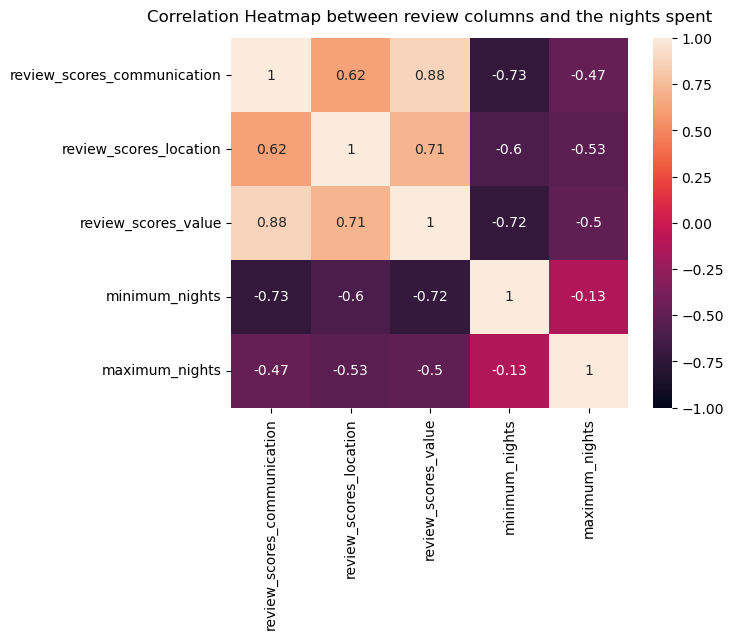

In [28]:
heatmap = sns.heatmap(corr_matrix.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap between review columns and the nights spent', fontdict={'fontsize':12}, pad=12)

# 2.5 Let's look at the data

For this section we will look at the  prices. We will see that whether the pric edata looks reasonable and what type of properties and rooms are in the data for the listings. 

For this purpose we will be creating a new dataframe called, `df2` that restricts attention to `room_type == Entire home/apt`. Once done with that, we will create another dataframe, called `df3` that takes `df2` and restricts attention to `property_type` that is equal to one of the following ones: Entire residential home, Entire rental unit, Entire condominium (condo), Entire guesthouse, Entire serviced apartment, Entire townhouse, and Entire bungalow.

There are a couple of things that call our attention here. First, what is the minimum price? The 25th percentile? The 99th percentile? The maximum price? This analysis will help us to determine whether the data needs to be cleaned further or not. 

To do this, note that we have two variables called `room_type` and `property_type`. Let's restrict first to `room_type == Entire home/apt`.

In [29]:
# Let's look at price
df['price2'].describe(percentiles = [ .25, .5, .75, 0.9, 0.95, 0.99])

count     4474.000000
mean       239.445910
std        522.738779
min          0.000000
25%        105.000000
50%        156.000000
75%        250.000000
90%        433.700000
95%        600.000000
99%       1228.100000
max      25000.000000
Name: price2, dtype: float64

# Explanation for price
The minimum price is 0.0 which shows that there are missing values. The 25th percentile is dollar 105, whereas the 99th percentile is  dollar 1228 and it is also interesting that the 90% percentile is USD 433 which means that there is a large bump between the percentiles. But when we look at the maximum price it has a huge difference as it accounts to $25000 which means that price has some outliers which needs more data cleaning. 

# Explanation:
No, the maximum value is $25000 which shows that the data is highlily skewed. The 50% percentile shows 156. The skewness can be because of the different types of the property type, which means that the data needs to be cleaned further.

In [30]:
# Create `df2` as defined above
df2 = df.loc[df['room_type']=='Entire home/apt']
#df2['room_type']
#print(df2['room_type'].unique())

Let's restrict the analysis, from now on, to properties of the types: Entire residential home, Entire rental unit, Entire condominium (condo), Entire guesthouse, Entire serviced apartment, Entire townhouse, and Entire bungalow.

In [31]:
# Create `df3` as defined above
df3 = df.loc[(df['property_type']=='Entire residential home') | (df['property_type']=='Entire rental unit') | (df['property_type']=='Entire condo') | (df['property_type']=='Entire guesthouse') | (df ['property_type']=='Entire serviced apartment') | (df['property_type']=='Entire townhouse') | (df['property_type']== 'Entire bungalow')]
#print(df3['property_type'].unique())
df3

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
3       148627                      Romantic Marina Garden Studio     709325   
4       494111                Comfortable space of your own in SF     252927   
6       148769            Ground Floor Studio with Garage Parking     709325   
...        ...                                                ...        ...   
6519  43423209  @ Marbella Lane - 6BR | Mission St. near SF | ...  118412894   
6550  48302359  44 - Luxury 4BD 3BA House at Westlake near BAR...  250584391   
6605  43354920                   Ultra Clean Studio Above The Bay  129165543   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
3    2011-06-16  San Francisco, CA                 100%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
6    2011-06-16  San Francisco, CA                 100%                 f   
...         ...                ...                  ...               ...   
6519 2017-02-27  San Francisco, CA                  97%                 f   
6550 2019-03-22  San Francisco, CA                  NaN                 f   
6605 2017-05-06  San Francisco, CA                  NaN                 f   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  maximum_nights  \
0       Duboce Triangle       Western Addition  37.77028  ...              30   
1        Bernal Heights         Bernal Heights  37.74474  ...              60   
3       Diamond Heights                 Marina  37.79961  ...             120   
4        Outer Richmond         Outer Richmond  37.77988  ...              90   
6       Diamond Heights             Twin Peaks  37.75045  ...              60   
...                 ...                    ...       ...  ...             ...   
6519           Pacifica          Outer Mission  37.70654  ...              90   
6550                NaN              Lakeshore  37.70074  ...              28   
6605                NaN         Crocker Amazon  37.70189  ...              60   
6624          Daly City             Ocean View  37.70141  ...             180   
6628          Daly City         Crocker Amazon  37.70590  ...              30   

     number_of_reviews review_scores_rating  review_scores_accuracy  \
0                  358                 4.86                    4.93   
1                  111                 4.88                    4.85   
3                  116                 4.29                    4.55   
4                  211                 4.65                    4.91   
6                   95                 4.16                    4.13   
...                ...                  ...                     ...   
6519                80                 4.75                    4.79   
6550                77                 4.95                    4.94   
6605               154                 4.93                    4.97   
6624               174                 4.66                    4.87   
6628                54                 4.94                    4.91   

      review_scores_communication  review_scores_location review_scores_value  \
0                            4.88                    4.98                4.77   
1                            4.85                    4.77                4.68   
3                            4.46                    4.63

# 2.6. Let's filter the data on price now

Here we will eb creating another datframe under the name of `df4` that takes `df3` and keeps observations that have prices that are above the 5th and below the 95th percentile of the distribution of price in `df3`. We will also plot the distribution of prices.We will also see hoe many listings and host are left. 

In [32]:
p_5 = df3.price2.quantile(0.05)

In [33]:
p_95=df3.price2.quantile(0.95)

In [34]:
# Create `df4` as defined above
df4= df3[df3.price2.gt(p_5) & df3.price2.lt(p_95)]
df4

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
4       494111                Comfortable space of your own in SF     252927   
9       501770   Contemporary Home with Mid-Century Modern Design    2475480   
10      503362                Million Dollar Penthouse, Remodeled    2475480   
...        ...                                                ...        ...   
6519  43423209  @ Marbella Lane - 6BR | Mission St. near SF | ...  118412894   
6550  48302359  44 - Luxury 4BD 3BA House at Westlake near BAR...  250584391   
6605  43354920                   Ultra Clean Studio Above The Bay  129165543   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
9    2012-05-27  San Francisco, CA                  83%                 t   
10   2012-05-27  San Francisco, CA                  83%                 t   
...         ...                ...                  ...               ...   
6519 2017-02-27  San Francisco, CA                  97%                 f   
6550 2019-03-22  San Francisco, CA                  NaN                 f   
6605 2017-05-06  San Francisco, CA                  NaN                 f   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  maximum_nights  \
0       Duboce Triangle       Western Addition  37.77028  ...              30   
1        Bernal Heights         Bernal Heights  37.74474  ...              60   
4        Outer Richmond         Outer Richmond  37.77988  ...              90   
9          Lower Haight         Haight Ashbury  37.77252  ...            1125   
10         Lower Haight         Haight Ashbury  37.77265  ...            1124   
...                 ...                    ...       ...  ...             ...   
6519           Pacifica          Outer Mission  37.70654  ...              90   
6550                NaN              Lakeshore  37.70074  ...              28   
6605                NaN         Crocker Amazon  37.70189  ...              60   
6624          Daly City             Ocean View  37.70141  ...             180   
6628          Daly City         Crocker Amazon  37.70590  ...              30   

     number_of_reviews review_scores_rating  review_scores_accuracy  \
0                  358                 4.86                    4.93   
1                  111                 4.88                    4.85   
4                  211                 4.65                    4.91   
9                  109                 4.86                    4.96   
10                 115                 4.93                    4.94   
...                ...                  ...                     ...   
6519                80                 4.75                    4.79   
6550                77                 4.95                    4.94   
6605               154                 4.93                    4.97   
6624               174                 4.66                    4.87   
6628                54                 4.94                    4.91   

      review_scores_communication  review_scores_location review_scores_value  \
0                            4.88                    4.98                4.77   
1                            4.85                    4.77                4.68   
4                            4.93                    4.66

In [35]:
df4.id.nunique()

1501

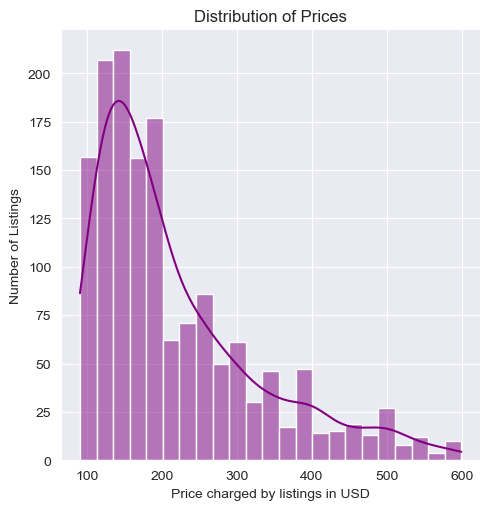

In [36]:
# Ploting the distribution
sns.set_style("darkgrid")
ax= sns.displot(df4["price2"], kind = "hist", kde=True, color= 'purple')
plt.title("Distribution of Prices")
ax.set(xlabel='Price charged by listings in USD', ylabel='Number of Listings')
ax.savefig (Figures + "Distribution of Prices.png", bbox_inches='tight')

How many listings remain? Unique hosts?

In [37]:
# Calculate the number of listings.
df4.shape[0]

1501

In [38]:
#unique hosts.
len(pd.unique(df4['host_id']))

1120

## 3. Plot the data

Now that we have a cleaned dataset (though we'll clean it more later...), we will make use of `folium` library to plot the locations.

In [39]:
# #df4['marker_color'] = pd.cut(df4['host_id'], bins=12, 
#                               labels=['red',
#     'blue',
#     'gray',
#     'darkred',
#     'lightred',
#     'lightgreen',
#     'orange',
#     'beige',
#     'green',               
#     'darkblue',
#     'lightblue',
#     'purple'])

#This doe snot make sense as python as the maximum 19 colors and hence cannot be used on host_id as they are more than 19.

In [40]:
f = folium.Figure(width=800, height=500)
m = folium.Map(location=[37.77028,-122.43317],zoom_start=9,tiles='CartoDB positron').add_to(f)
for index, row in df4.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], color='purple',
    radius=.5).add_to(m)
m

## 4. Let's learn about hosts

There are fewer hosts than listings. This means that some hosts manage more than one listing. 

## 4.1 Let's create a dataframe of hosts

This dataframe, called `df_hosts` will have, for each unique host, the total number of listings that it manages, the average price of the listings, and its super host status. The idea is to check if hosts that manage more than one listing charge higher or lower prices on average and to examine how the average price varies with the number of listings managed by each host (and the same for super host status).

In [41]:
# Create `df_hosts`. A good way to do this is to use `groupby` focusing on the different variables of interest and the operations you want to do with each of them.
df_hosts = df4.groupby (['host_id']).agg({'id':'count','price2':'mean', 'host_is_superhost2':'sum'}).reset_index()
df_hosts

host_id  id      price2  host_is_superhost2
0          1169   1  180.000000                   1
1          8904   1  235.000000                   0
2         18732   1  250.000000                   0
3         24910   1  400.000000                   0
4         32132   1  240.000000                   0
...         ...  ..         ...                 ...
1115  457763098   1  300.000000                   0
1116  457927551   1  358.000000                   0
1117  470398184   1  175.000000                   0
1118  472328815   1  161.000000                   0
1119  472578296   6  127.333333                   0

[1120 rows x 4 columns]

In [42]:
#Number of hosts that are superhosts. 
df_hosts['host_is_superhost2'].value_counts()

0    684
1    372
2     46
3      6
4      6
8      2
5      2
6      2
Name: host_is_superhost2, dtype: int64

In [43]:
#Renaming price2 to avg_price
df_hosts = df_hosts.rename ({'price2': 'avg_price'}, axis=1)

In [44]:
#Renaming id to id n_listings 
df_hosts = df_hosts.rename({'id': 'n_listings'}, axis=1) 

In [45]:
#Renaming host_is_superhost2 to superhost_status
df_hosts = df_hosts.rename({'host_is_superhost2': 'superhost_status'}, axis=1) 

In [46]:
print(df_hosts['n_listings'].unique())

[ 1 13  2  3  4  8 30 18  5  6  7 33 11 10 17]


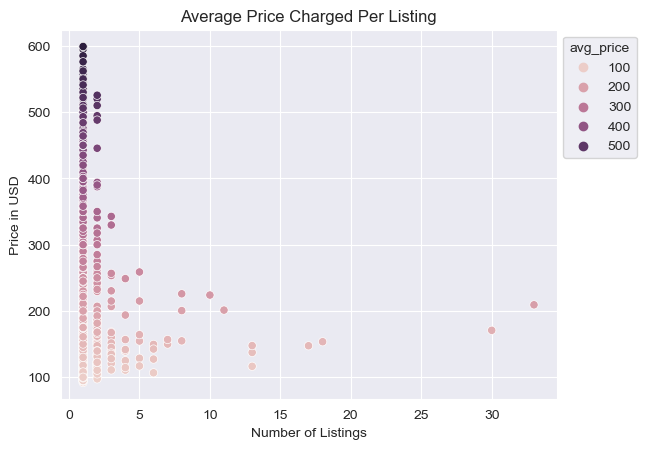

In [47]:
# Make a scatterplot (`sns.scatterplot`) that has the number of listings per host on the horizontal axis and the mean price charged by that host on the vertical axis.
ax = sns.scatterplot (data=df_hosts, x='n_listings', y ='avg_price', hue='avg_price')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel ("Price in USD")
plt.xlabel ("Number of Listings")
plt.title ("Average Price Charged Per Listing")
plt.savefig (Figures + "Average Price Charged Per Listing.png", bbox_inches='tight')

It is clear that there are few hosts with many listings. Let's identify these and drop them, and their listings, from the data. Before doing this, however, let's see what type of listings belong to these hosts.

# 4.2. Drop hosts that have more than 50 listings 

Take `df4` and create a new dataframe, `df5` that drops hosts with more than 50 listings (and those listings as well).

In [48]:
# Identify the hosts that have more than 50 listings (use logical indexing to do this)
#Since I dropped listings that were outside San Francisco that is why we have an empty dataframe eariler it had 232 rows. 
df4.groupby("host_id").filter(lambda x: len(x)>50)

Empty DataFrame
Columns: [id, name, host_id, host_since, host_location, host_acceptance_rate, host_is_superhost, host_neighbourhood, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bedrooms, beds, price, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_communication, review_scores_location, review_scores_value, price2, host_acceptance_rate2, host_is_superhost2]
Index: []

[0 rows x 28 columns]

In [49]:
# Create `df5` by taking `df4` and keeping only hosts who have less than 50 listings.
df5 = df4.groupby("host_id").filter(lambda x: len(x)<50). reset_index()
df5= df5.drop(columns=['index'], axis=1)
#df5= ["host_id"]
df5

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2       494111                Comfortable space of your own in SF     252927   
3       501770   Contemporary Home with Mid-Century Modern Design    2475480   
4       503362                Million Dollar Penthouse, Remodeled    2475480   
...        ...                                                ...        ...   
1496  43423209  @ Marbella Lane - 6BR | Mission St. near SF | ...  118412894   
1497  48302359  44 - Luxury 4BD 3BA House at Westlake near BAR...  250584391   
1498  43354920                   Ultra Clean Studio Above The Bay  129165543   
1499  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
1500  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
2    2010-10-04  San Francisco, CA                  87%                 t   
3    2012-05-27  San Francisco, CA                  83%                 t   
4    2012-05-27  San Francisco, CA                  83%                 t   
...         ...                ...                  ...               ...   
1496 2017-02-27  San Francisco, CA                  97%                 f   
1497 2019-03-22  San Francisco, CA                  NaN                 f   
1498 2017-05-06  San Francisco, CA                  NaN                 f   
1499 2018-07-08  San Francisco, CA                  60%                 f   
1500 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  maximum_nights  \
0       Duboce Triangle       Western Addition  37.77028  ...              30   
1        Bernal Heights         Bernal Heights  37.74474  ...              60   
2        Outer Richmond         Outer Richmond  37.77988  ...              90   
3          Lower Haight         Haight Ashbury  37.77252  ...            1125   
4          Lower Haight         Haight Ashbury  37.77265  ...            1124   
...                 ...                    ...       ...  ...             ...   
1496           Pacifica          Outer Mission  37.70654  ...              90   
1497                NaN              Lakeshore  37.70074  ...              28   
1498                NaN         Crocker Amazon  37.70189  ...              60   
1499          Daly City             Ocean View  37.70141  ...             180   
1500          Daly City         Crocker Amazon  37.70590  ...              30   

     number_of_reviews review_scores_rating  review_scores_accuracy  \
0                  358                 4.86                    4.93   
1                  111                 4.88                    4.85   
2                  211                 4.65                    4.91   
3                  109                 4.86                    4.96   
4                  115                 4.93                    4.94   
...                ...                  ...                     ...   
1496                80                 4.75                    4.79   
1497                77                 4.95                    4.94   
1498               154                 4.93                    4.97   
1499               174                 4.66                    4.87   
1500                54                 4.94                    4.91   

      review_scores_communication  review_scores_location review_scores_value  \
0                            4.88                    4.98                4.77   
1                            4.85                    4.77                4.68   
2                            4.93                    4.66

# 4.3. Merge the information in your dataframe of "small hosts" (mean price and number of listings managed by each host) with that in `df5`

In [50]:
# Merge the information as described above
df5 = pd.merge(df5, df_hosts, how='left', on = [ 'host_id'])
df5

id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
2       494111                Comfortable space of your own in SF     252927   
3       501770   Contemporary Home with Mid-Century Modern Design    2475480   
4       503362                Million Dollar Penthouse, Remodeled    2475480   
...        ...                                                ...        ...   
1496  43423209  @ Marbella Lane - 6BR | Mission St. near SF | ...  118412894   
1497  48302359  44 - Luxury 4BD 3BA House at Westlake near BAR...  250584391   
1498  43354920                   Ultra Clean Studio Above The Bay  129165543   
1499  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
1500  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
2    2010-10-04  San Francisco, CA                  87%                 t   
3    2012-05-27  San Francisco, CA                  83%                 t   
4    2012-05-27  San Francisco, CA                  83%                 t   
...         ...                ...                  ...               ...   
1496 2017-02-27  San Francisco, CA                  97%                 f   
1497 2019-03-22  San Francisco, CA                  NaN                 f   
1498 2017-05-06  San Francisco, CA                  NaN                 f   
1499 2018-07-08  San Francisco, CA                  60%                 f   
1500 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  \
0       Duboce Triangle       Western Addition  37.77028  ...   
1        Bernal Heights         Bernal Heights  37.74474  ...   
2        Outer Richmond         Outer Richmond  37.77988  ...   
3          Lower Haight         Haight Ashbury  37.77252  ...   
4          Lower Haight         Haight Ashbury  37.77265  ...   
...                 ...                    ...       ...  ...   
1496           Pacifica          Outer Mission  37.70654  ...   
1497                NaN              Lakeshore  37.70074  ...   
1498                NaN         Crocker Amazon  37.70189  ...   
1499          Daly City             Ocean View  37.70141  ...   
1500          Daly City         Crocker Amazon  37.70590  ...   

      review_scores_accuracy review_scores_communication  \
0                       4.93                        4.88   
1                       4.85                        4.85   
2                       4.91                        4.93   
3                       4.96                        4.87   
4                       4.94                        4.95   
...                      ...                         ...   
1496                    4.79                        4.88   
1497                    4.94                        4.99   
1498                    4.97                        5.00   
1499                    4.87                        4.91   
1500                    4.91                        5.00   

     review_scores_location  review_scores_value  price2  \
0                      4.98                 4.77     180   
1                      4.77                 4.68     235   
2                      4.66                 4.63     146   
3                      4.74                 4.59     220   
4                      4.79                 4.72     350   
...                     ...                  ...     ...   
1496                   4.45                 4.65     360   
1497                   4.94                 4.88     304   
1498                   4.91                 4.92      99   
1499                   4

In [51]:
print(df5['n_listings'].unique())

[ 1  2  4  3 30  6  5 13 33  7 18  8 11 17 10]


## 5. Econometrics

In this section, we'll use `statsmodels`, `patsy`, and `linearmodels` to examine how listings and host attributes are related to listing price. Note that some variables have many missing observations so while we won't drop them explicitly, `linearmodels` won't consider those observations in the analysis.

Define the dataframe `panel` by taking `df5` and restricting to `df5[['host_id','bedrooms', 'beds','number_of_reviews','review_scores_rating','price2','host_is_superhost2', 'n_listings']]`. 

You will also need to define `df5['time']=1` to serve as a time fixed effect (that we won't use) and set `panel = panel.set_index(['host_id','time'])` as the indexes to be used in estimation. Then proceed to add a constant to `panel` when defining the exogenous variables that go into the regression (we did this in the ML handout). Define the dependent variable to be the natural logarithm of the price.

In [52]:
import statsmodels.api as sm

# 5.1 Create two additional variables

Choose two locations in the city that you chose, that you consider would be of interest to a tourist. Make sure these locations are not near each other and, ideally, these should be on opposite sides of the city. Then, compute the linear distance from each listing to the two locations of interest and add this information to `df5`. Do not compute driving distances.

In [53]:
df_corr1 = {'name': 'Bernel Heights', 'latitude':  37.744385,'longitude': -122.417046}
df_corr2 = {'name': 'Lombard Street', 'latitude':  37.801945,'longitude': -122.418892}

In [54]:
df5 = df5.append(df_corr1, ignore_index = True)
df5

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/1158500557.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_corr1, ignore_index = True)


id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1497  48302359.0  44 - Luxury 4BD 3BA House at Westlake near BAR...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1497  250584391.0 2019-03-22  San Francisco, CA                  NaN   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1497                 f                NaN              Lakeshore  37.700740   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   

      ...  review_scores_accuracy review_scores_communication  \
0     ...                    4.93                        4.88   
1     ...                    4.85                        4.85   
2     ...                    4.91                        4.93   
3     ...                    4.96                        4.87   
4     ...                    4.94                        4.95   
...   ...                     ...                         ...   
1497  ...                    4.94                        4.99   
1498  ...                    4.97                        5.00   
1499  ...                    4.87                        4.91   
1500  ...                    4.91                        5.00   
1501  ...                     NaN                         NaN   

     review_scores_location  review_scores_value  price2  \
0                      4.98                 4.77   180.0   
1                      4.77                 4.68   235.0   
2                      4.66                 4.63   146.0   
3                      4.74                 4.59   220.0   
4                      4.79                 4.72   350.0   
...                     ...                  ...     ...   
1497                   4.94                 4.88   304.0   
1498                   4.91                 4.92    99.0   
1499                   4.6

In [55]:
df5 = df5.append(df_corr2, ignore_index = True)
df5

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/279870480.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append(df_corr2, ignore_index = True)


id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_accuracy review_scores_communication  \
0     ...                    4.93                        4.88   
1     ...                    4.85                        4.85   
2     ...                    4.91                        4.93   
3     ...                    4.96                        4.87   
4     ...                    4.94                        4.95   
...   ...                     ...                         ...   
1498  ...                    4.97                        5.00   
1499  ...                    4.87                        4.91   
1500  ...                    4.91                        5.00   
1501  ...                     NaN                         NaN   
1502  ...                     NaN                         NaN   

     review_scores_location  review_scores_value  price2  \
0                      4.98                 4.77   180.0   
1                      4.77                 4.68   235.0   
2                      4.66                 4.63   146.0   
3                      4.74                 4.59   220.0   
4                      4.79                 4.72   350.0   
...                     ...                  ...     ...   
1498                   4.91                 4.92    99.0   
1499                   4.60                 4.73   108.0   
1500                   4.7

In [56]:
# Write down the function that you will use to loop over all listings and compute the distance to the points of interest. 
def distance(origin,destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [57]:
# Write down the function that you will use to loop over all listings and compute the distance to the points of interest. 
#This will also calculate the distance between the two locations of interest.
def distance_harvesine(df):

    # I'll use a dictionary because it doesn't need to have a pre-defined size.
    
    dict_distance = {}
    
    df_copy = df5.copy(deep=False)      #Making a copy for the dataframe
    
#     for i, row in df_copy.iterrows():
#         list_distance = []
        
    # lon1 = -122.417046
    # lat1 = 37.744385
        

    for i, row in df_copy.iterrows():
        list_distance = []
            
        lon1 = df_copy['longitude'][i]
        lat1 = df_copy['latitude'][i]
        origin = (lat1,lon1)
        
        
        lon2 = -122.417046
        lat2 = 37.744385
        
        destination = (lat2, lon2)
            
        try:
            dist = distance(origin, destination)
        except:
            dist = 100000000000
                                
        list_distance.append(dist)
            
            
        dict_distance[i] = list_distance
            
            

            
    distance_col= pd.DataFrame.from_dict(dict_distance)

    return distance_col

In [58]:
# Write down the function that you will use to compute the linear distance between two points (this could be the same as the `distance` function we used in the Spatial Data module that uses the `math` package).
distance_BH = distance_harvesine(df5)
distance_BH =distance_BH.T
distance_BH = distance_BH.rename(columns={ distance_BH.columns[0]:'Distance 1'})
distance_BH

Distance 1
0       3.209390
1       0.340289
2       7.150908
3       3.651191
4       3.668562
...          ...
1498    4.738464
1499    6.238844
1500    4.436885
1501    0.000000
1502    6.402436

[1503 rows x 1 columns]

In [59]:
# Write down the function that you will use to loop over all listings and compute the distance to the points of interest. 
#This will also calculate the distance between the two locations of interest.
def distance_harvesine(df):

    # I'll use a dictionary because it doesn't need to have a pre-defined size.
    
    dict_distance = {}
    
    df_copy = df5.copy(deep=False)      #Making a copy for the dataframe
    
#     for i, row in df_copy.iterrows():
#         list_distance = []
        
    lon1 = -122.418892
    lat1 = 37.801945
        
    destination = (lat1,lon1)

    for i, row in df_copy.iterrows():
        list_distance = []
            
        lon1 = df_copy['longitude'][i]
        lat1 = df_copy['latitude'][i]
            
        origin = (lat1,lon1)
        
        lon2 = -122.418892
        lat2 = 37.801945
        
        destination = (lat2,lon2)
            
        try:
            dist = distance( origin, destination)
        except:
            dist = 100000000000
                                
        list_distance.append(dist)
            
            
        dict_distance[i] = list_distance
            
            

            
    distance_col= pd.DataFrame.from_dict(dict_distance)

    return distance_col

In [60]:
distance_LS = distance_harvesine(df5)
distance_LS = distance_LS.T
distance_LS = distance_LS.rename(columns={ distance_LS.columns[0]:'Distance 2'})
distance_LS

Distance 2
0       3.737870
1       6.363329
2       6.296216
3       3.696256
4       3.687988
...          ...
1498   11.127256
1499   11.822443
1500   10.727284
1501    6.402436
1502    0.000000

[1503 rows x 1 columns]

In [61]:
# original dataframe plus two columns with distance to the locations of interest. Call the output dataframe `df6`
df5["Distance_BH"]= distance_BH
df5

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_communication review_scores_location  \
0     ...                         4.88                   4.98   
1     ...                         4.85                   4.77   
2     ...                         4.93                   4.66   
3     ...                         4.87                   4.74   
4     ...                         4.95                   4.79   
...   ...                          ...                    ...   
1498  ...                         5.00                   4.91   
1499  ...                         4.91                   4.60   
1500  ...                         5.00                   4.78   
1501  ...                          NaN                    NaN   
1502  ...                          NaN                    NaN   

     review_scores_value  price2  host_acceptance_rate2  host_is_superhost2  \
0                   4.77   180.0                   0.98                 1.0   
1                   4.68   235.0                   0.70                 0.0   
2                   4.63   146.0                   0.87                 1.0   
3                   4.59   220.0                   0.83                 1.0   
4                   4.72   350.0                   0.83                 1.0   
...                  ...     ...                    ...                 ...   
1498         

In [62]:
df5["Distance_LS"]= distance_LS
df5

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_location review_scores_value price2  \
0     ...                    4.98                4.77  180.0   
1     ...                    4.77                4.68  235.0   
2     ...                    4.66                4.63  146.0   
3     ...                    4.74                4.59  220.0   
4     ...                    4.79                4.72  350.0   
...   ...                     ...                 ...    ...   
1498  ...                    4.91                4.92   99.0   
1499  ...                    4.60                4.73  108.0   
1500  ...                    4.78                4.89  138.0   
1501  ...                     NaN                 NaN    NaN   
1502  ...                     NaN                 NaN    NaN   

      host_acceptance_rate2  host_is_superhost2  n_listings avg_price  \
0                      0.98                 1.0         1.0    180.00   
1                      0.70                 0.0         1.0    235.00   
2                      0.87                 1.0         2.0    248.00   
3                      0.83                 1.0         4.0    248.75   
4                      0.83                 1.0         4.0    248.75   
...                     ...                 ...         ...       ...   
1498                    NaN                 0.0         1.0     99.

In [63]:
# original dataframe plus two columns with distance to the locations of interest. Call the output dataframe `df6
df6 = df5
df6

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_location review_scores_value price2  \
0     ...                    4.98                4.77  180.0   
1     ...                    4.77                4.68  235.0   
2     ...                    4.66                4.63  146.0   
3     ...                    4.74                4.59  220.0   
4     ...                    4.79                4.72  350.0   
...   ...                     ...                 ...    ...   
1498  ...                    4.91                4.92   99.0   
1499  ...                    4.60                4.73  108.0   
1500  ...                    4.78                4.89  138.0   
1501  ...                     NaN                 NaN    NaN   
1502  ...                     NaN                 NaN    NaN   

      host_acceptance_rate2  host_is_superhost2  n_listings avg_price  \
0                      0.98                 1.0         1.0    180.00   
1                      0.70                 0.0         1.0    235.00   
2                      0.87                 1.0         2.0    248.00   
3                      0.83                 1.0         4.0    248.75   
4                      0.83                 1.0         4.0    248.75   
...                     ...                 ...         ...       ...   
1498                    NaN                 0.0         1.0     99.

# 5.2 Show, on a `folium` map the location of the listings in `df5` as well as of the locations of interest. Use one color for all the listings and a different color for the two locations of interest.

In [64]:
# Function to assign color to listings and two locations of interest 
def assign_marker_color(name):
    if name == "Bernel Heights":
        return 'red'
    elif name == "Lombard Street":
        return 'blue'
    else:
        return 'green'
    
df5['marker_color'] = df5['name'].apply(assign_marker_color)
df5

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_value price2 host_acceptance_rate2  \
0     ...                 4.77  180.0                  0.98   
1     ...                 4.68  235.0                  0.70   
2     ...                 4.63  146.0                  0.87   
3     ...                 4.59  220.0                  0.83   
4     ...                 4.72  350.0                  0.83   
...   ...                  ...    ...                   ...   
1498  ...                 4.92   99.0                   NaN   
1499  ...                 4.73  108.0                  0.60   
1500  ...                 4.89  138.0                  0.00   
1501  ...                  NaN    NaN                   NaN   
1502  ...                  NaN    NaN                   NaN   

      host_is_superhost2  n_listings  avg_price superhost_status  Distance_BH  \
0                    1.0         1.0     180.00              1.0     3.209390   
1                    0.0         1.0     235.00              0.0     0.340289   
2                    1.0         2.0     248.00              2.0     7.150908   
3                    1.0         4.0     248.75              4.0     3.651191   
4                    1.0         4.0     248.75              4.0     3.668562   
...                  ...         ...        ...              ...          ...   
1498                 0.

In [65]:
f = folium.Figure(width=800, height=500)
m = folium.Map(location=[37.744385,-122.417046], zoom_start=9, tiles='CartoDB positron').add_to(f) #30.555328, -96.261617], zoom_start=10, tiles='CartoDB positron').add_to(f)
for i in range(0,len(df5)):
   folium.CircleMarker(
      location=[df5.iloc[i]['latitude'], df5.iloc[i]['longitude']],
       popup=df5.iloc[i]['name'], color= df5.iloc [i]['marker_color'], radius= .5
   ).add_to(m)
m

In [66]:
df5=df5.drop(columns=['marker_color'])

In [67]:
df5

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_location review_scores_value price2  \
0     ...                    4.98                4.77  180.0   
1     ...                    4.77                4.68  235.0   
2     ...                    4.66                4.63  146.0   
3     ...                    4.74                4.59  220.0   
4     ...                    4.79                4.72  350.0   
...   ...                     ...                 ...    ...   
1498  ...                    4.91                4.92   99.0   
1499  ...                    4.60                4.73  108.0   
1500  ...                    4.78                4.89  138.0   
1501  ...                     NaN                 NaN    NaN   
1502  ...                     NaN                 NaN    NaN   

      host_acceptance_rate2  host_is_superhost2  n_listings avg_price  \
0                      0.98                 1.0         1.0    180.00   
1                      0.70                 0.0         1.0    235.00   
2                      0.87                 1.0         2.0    248.00   
3                      0.83                 1.0         4.0    248.75   
4                      0.83                 1.0         4.0    248.75   
...                     ...                 ...         ...       ...   
1498                    NaN                 0.0         1.0     99.

# 5.3 Analysis

In [68]:
import statsmodels.api as sm
from patsy import dmatrices
from linearmodels.panel import PanelOLS

In [69]:
# Do all the data manipulation as described above and in the ML module
df5['time']=1 

# 5.4. Estimate the linear model without fixed effects _and_ discuss your findings. Remember to add the distance to the two touristic locations as covariates in your set of independent variables (e.g., the X's).

In [70]:
panel= df5[['host_id','bedrooms', 'beds','number_of_reviews','review_scores_rating','price2','host_is_superhost2', 'time','n_listings','Distance_BH', 'Distance_LS']]
panel['log_price'] = np.log(panel['price2'])
panel.set_index(['host_id','time'], inplace=True)

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/2815432268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel['log_price'] = np.log(panel['price2'])


In [71]:
dependent = panel.log_price

In [72]:
exog = sm.add_constant(panel[['bedrooms','beds','number_of_reviews','review_scores_rating','host_is_superhost2','n_listings','Distance_BH', 'Distance_LS']]) 

In [73]:
dependent

host_id      time
1169.0       1       5.192957
8904.0       1       5.459586
252927.0     1       4.983607
2475480.0    1       5.393628
             1       5.857933
                       ...   
129165543.0  1       4.595120
200874180.0  1       4.682131
261616147.0  1       4.927254
NaN          1            NaN
             1            NaN
Name: log_price, Length: 1503, dtype: float64

In [74]:
# Estimate the model without fixed effects as we did in the ML module
modNFE = PanelOLS(dependent, exog, entity_effects=False)
resNFE = modNFE.fit(cov_type='unadjusted')
print(resNFE)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log_price   R-squared:                        0.2918
Estimator:                   PanelOLS   R-squared (Between):              0.2984
No. Observations:                1149   R-squared (Within):               0.0000
Date:                Mon, Sep 04 2023   R-squared (Overall):              0.2918
Time:                        15:20:08   Log-likelihood                   -541.70
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      58.719
Entities:                         915   P-value                           0.0000
Avg Obs:                       1.2557   Distribution:                  F(8,1140)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             58.719
                            

/Users/aimanmalik/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Findings without fixed effects:
As the number of bedrooms increases by 1% the price increases by 26.8% and the result is statistically significant as the p-value is 0.00 which is less than 0.05, and the confidence interval of ( 3.8188,4.4006) doesn't contain zero in it. If number of reviews increases by 1% the price increases by 0.03% which is quite insginificant however the results are statistically significant as p-value of 0.03 is less than 0.05. If review_scores_rating increases by 1% the price increases by 16.9% and the results are statistically significant as the p-value of 0.00 is less than 0.05 and the confidence interval of (0.1120,0.2255) does not contain zero in it. If the host is a superhost the price increases by 7.9% and the result is statistically significant as p-value of 0.0016 is less than 0.05 and the confidence interval of(0.0298, 0.1272) does not contain zero. However, beds, n_listings,and the distance from location Bernel Heights is not statistically significant, whereas the distance from Lombard Street is statistically significant and the price decreases by 22%. 
The R-sqaured for this model is 29.2%, which means that the exogenous variation only show 29.2%  of variation in log of price. 

# 5.5. Add `entity_effects` that correspond to the `host_id`. Add `drop_absorbed = True` when defining the problem.

Let's now control for host FE to capture, for example, the ability of a host (as host with multiple listings may be more skilled). Note that some covariates will be dropped because the fixed effect will be collinear with any variable that doesn't change across listings. Discuss your findings.

In [75]:
modFE = PanelOLS(dependent, exog,entity_effects=True, time_effects = False, drop_absorbed=True)
resFE = modFE.fit(cov_type='unadjusted')
print(resFE)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log_price   R-squared:                        0.5162
Estimator:                   PanelOLS   R-squared (Between):              0.2353
No. Observations:                1149   R-squared (Within):               0.0000
Date:                Mon, Sep 04 2023   R-squared (Overall):              0.2280
Time:                        15:20:08   Log-likelihood                    1295.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      40.548
Entities:                         915   P-value                           0.0000
Avg Obs:                       1.2557   Distribution:                   F(6,228)
Min Obs:                       1.0000                                           
Max Obs:                       24.000   F-statistic (robust):             40.548
                            

/Users/aimanmalik/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3124419663.py:2: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

host_is_superhost2, n_listings

  resFE = modFE.fit(cov_type='unadjusted')


# Explanation for findings with fixed effects
The variable of super host status and listings have been absorbed in the regression. However, bedrooms are still a statistically significant variable with the p-value of 0.000 which is less than 0.05 and the confidence interval does not include zero. The prices increases by 28% if the bedrooms increases by 1%. Both the distances are statitically significant now but they have a negative realtion as the price decreases by 3% and 3.2 for Bernel Heights and Lombard Street respectively. Beds, number of reviews and review score ratings are no longer statistically significant.
The R-sqaured for this model is 22.8% which means that means that the exogenous variables in this model only show 22.8% of variation in log of price.

## 6. Let's now turn to listings

In this section we will prepare the scene for the main part of the analysis: Who competes with whom? How do rival prices impact the price charged for a listing? How does this depend on the number of rivals that a listing faces?

To address these questions, we will first determine which listings are direct competitors of each other. Instead of computing distances, as we did in class, we'll use Hierarchical Clustering as it is much less intensive in terms of memory usage and the size of the files that are generated. By using HC, we'll be able to identify listings that are near each other and belong to the same market/cluster. With this, we'll be able to determine which listings compete against each other.

Once we have the set of listings that compete with each other, we will compute, for each listing, the average price of its rivals' listings. 

With all of this, we will examine how prices depend not only on the listing's attribute and the super host status of who manages it (and the number of listings that host manages), but also with the average price of the rival listings and the number of rivals in the cluster.

Let's get started. First step, determine which listings compete against each other. Create a matrix X as follows (adapt this code to your setting):

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [77]:
X = np.zeros((df4.shape[0],2))
X[:,0] = df4['latitude']
X[:,1] = df4['longitude']
X

array([[  37.77028, -122.43317],
       [  37.74474, -122.42089],
       [  37.77988, -122.48488],
       ...,
       [  37.70189, -122.42107],
       [  37.70141, -122.46265],
       [  37.7059 , -122.43037]])

In [78]:
from scipy.cluster.vq import kmeans, vq, kmeans2

Using the `linkage` function with `method = centroid`. Once you have the output:

- plot the `dendrogram`,
- use a distance measure of 0.005 to trim the tree and define clusters.

After doing so, we will be able to answer the following questions:

1. How many clusters are there? 
2. Making a histogram of the distribution of the number of listings per cluster.
3. What is the mean number of listings per market? Median? Standard deviation? Minimum? Maximum?
4. Making a scatterplot of the data, using `sns.scatterplot` that uses `hue` to color code the clusters.


In [79]:
# Define the problem and use `linkage`
Zc = linkage(X, 'centroid')

In [80]:
Zc.shape

(1500, 4)

In [81]:
Zc

array([[1.07600000e+03, 1.08700000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.13800000e+03, 1.50100000e+03, 0.00000000e+00, 3.00000000e+00],
       [6.19000000e+02, 6.23000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.99400000e+03, 2.99500000e+03, 5.60867317e-02, 1.25900000e+03],
       [2.99600000e+03, 2.99800000e+03, 5.88805941e-02, 1.43700000e+03],
       [2.99700000e+03, 2.99900000e+03, 5.74123584e-02, 1.50100000e+03]])

In [82]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [83]:
c, coph_dists = cophenet(Zc, pdist(X))
c

0.7601722255479867

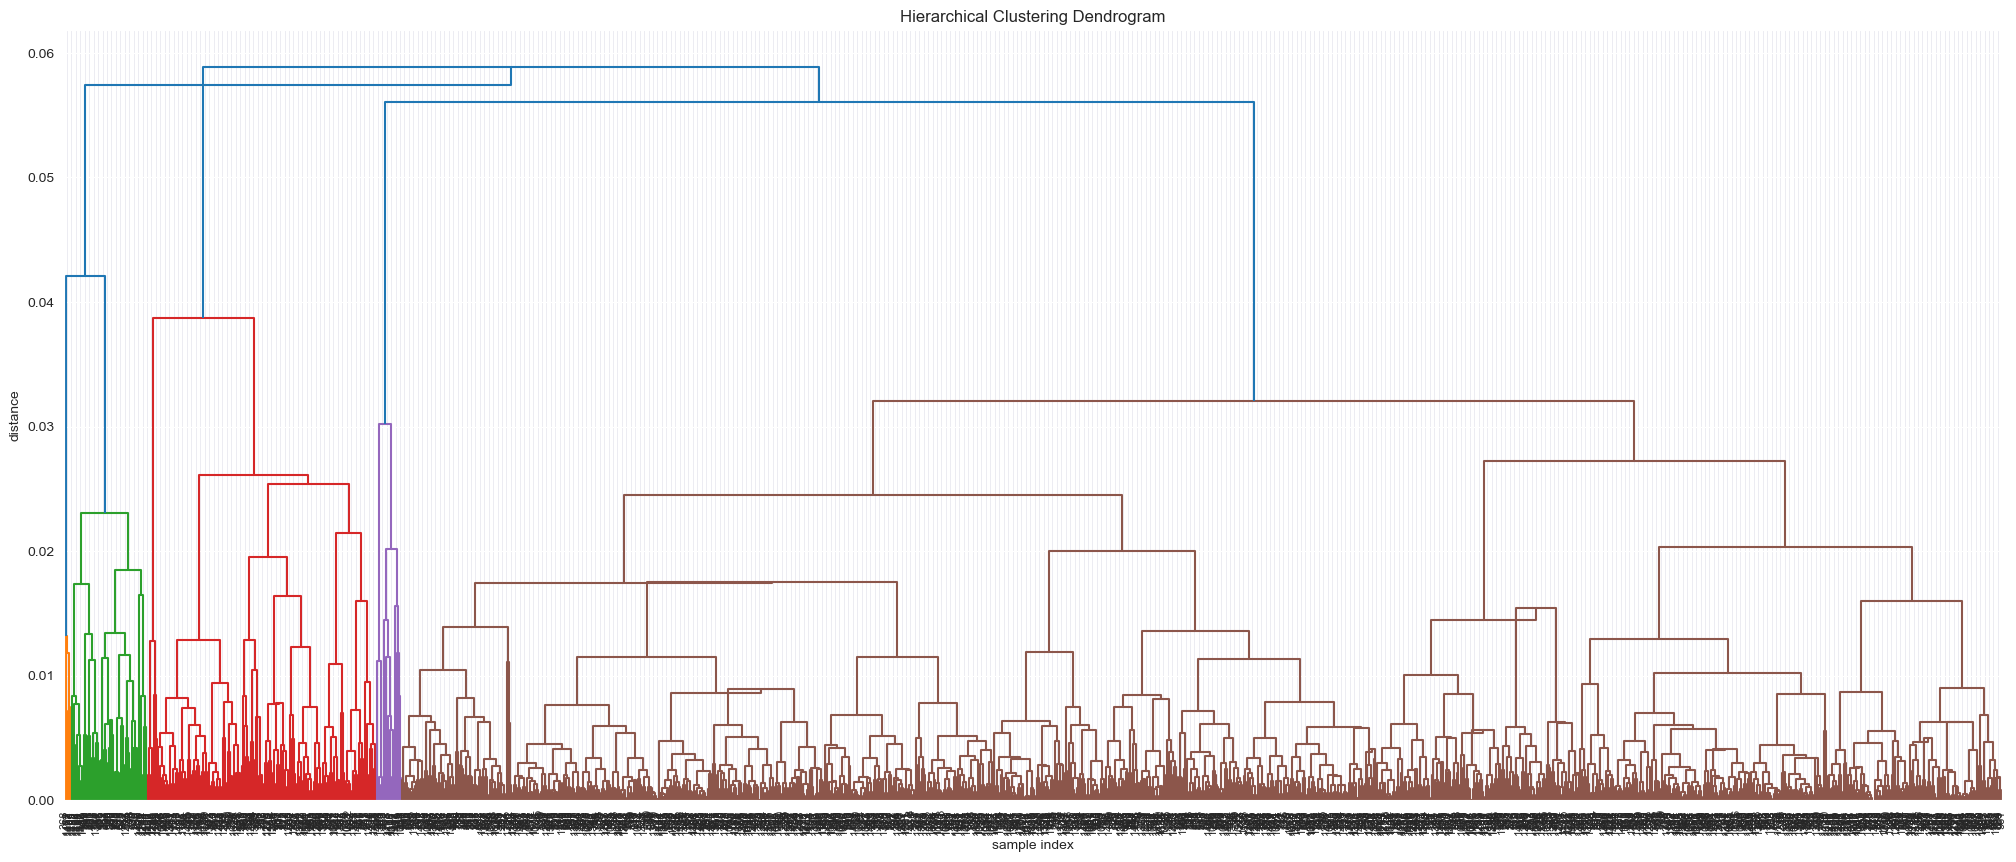

<Figure size 640x480 with 0 Axes>

In [85]:
# Plot the dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Zc,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
plt.savefig (Figures + 'Hierarchical Clustering Dendrogram.png', bbox_inches='tight')

In [84]:
from scipy.cluster.hierarchy import fcluster

In [85]:
# Define the clusters using a distance measure of 0.005
clusters = fcluster(Zc,t=0.005,criterion='distance')
clusters

array([ 94, 118,  64, ...,  31,   7,  29], dtype=int32)

In [86]:
len(clusters)

1501

In [87]:
#Adding the cluster id column. 
df4['cluster_hc'] = clusters
df4

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3968832728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['cluster_hc'] = clusters


id                                               name    host_id  \
0          958              Bright, Modern Garden Unit - 1BR/1BTH       1169   
1         5858                                 Creative Sanctuary       8904   
4       494111                Comfortable space of your own in SF     252927   
9       501770   Contemporary Home with Mid-Century Modern Design    2475480   
10      503362                Million Dollar Penthouse, Remodeled    2475480   
...        ...                                                ...        ...   
6519  43423209  @ Marbella Lane - 6BR | Mission St. near SF | ...  118412894   
6550  48302359  44 - Luxury 4BD 3BA House at Westlake near BAR...  250584391   
6605  43354920                   Ultra Clean Studio Above The Bay  129165543   
6624  27232655     Lovely Apartment in a Convenient Area / Unit A  200874180   
6628  34681471  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...  261616147   

     host_since      host_location host_acceptance_rate host_is_superhost  \
0    2008-07-31  San Francisco, CA                  98%                 t   
1    2009-03-02  San Francisco, CA                  70%                 f   
4    2010-10-04  San Francisco, CA                  87%                 t   
9    2012-05-27  San Francisco, CA                  83%                 t   
10   2012-05-27  San Francisco, CA                  83%                 t   
...         ...                ...                  ...               ...   
6519 2017-02-27  San Francisco, CA                  97%                 f   
6550 2019-03-22  San Francisco, CA                  NaN                 f   
6605 2017-05-06  San Francisco, CA                  NaN                 f   
6624 2018-07-08  San Francisco, CA                  60%                 f   
6628 2019-05-13  San Francisco, CA                   0%                 f   

     host_neighbourhood neighbourhood_cleansed  latitude  ...  \
0       Duboce Triangle       Western Addition  37.77028  ...   
1        Bernal Heights         Bernal Heights  37.74474  ...   
4        Outer Richmond         Outer Richmond  37.77988  ...   
9          Lower Haight         Haight Ashbury  37.77252  ...   
10         Lower Haight         Haight Ashbury  37.77265  ...   
...                 ...                    ...       ...  ...   
6519           Pacifica          Outer Mission  37.70654  ...   
6550                NaN              Lakeshore  37.70074  ...   
6605                NaN         Crocker Amazon  37.70189  ...   
6624          Daly City             Ocean View  37.70141  ...   
6628          Daly City         Crocker Amazon  37.70590  ...   

      number_of_reviews review_scores_rating review_scores_accuracy  \
0                   358                 4.86                   4.93   
1                   111                 4.88                   4.85   
4                   211                 4.65                   4.91   
9                   109                 4.86                   4.96   
10                  115                 4.93                   4.94   
...                 ...                  ...                    ...   
6519                 80                 4.75                   4.79   
6550                 77                 4.95                   4.94   
6605                154                 4.93                   4.97   
6624                174                 4.66                   4.87   
6628                 54                 4.94                   4.91   

      review_scores_communication  review_scores_location  \
0                            4.88                    4.98   
1                            4.85                    4.77   
4                            4.93                    4.66   
9                            4.87                    4.74   
10                           4.95                    4.79   
...                           ...                     ...   
6519                         4.88                    4.45   
6550

In [88]:
# Add the cluster ids to `df5`
#pd.merge(df5, df_hosts, how='left', on = [ 'host_id'])
df5 = pd.merge(df5,df4[['id','cluster_hc']], on='id', how ='left')
df5

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  price2 host_acceptance_rate2 host_is_superhost2  n_listings  \
0     ...   180.0                  0.98                1.0         1.0   
1     ...   235.0                  0.70                0.0         1.0   
2     ...   146.0                  0.87                1.0         2.0   
3     ...   220.0                  0.83                1.0         4.0   
4     ...   350.0                  0.83                1.0         4.0   
...   ...     ...                   ...                ...         ...   
1498  ...    99.0                   NaN                0.0         1.0   
1499  ...   108.0                  0.60                0.0         2.0   
1500  ...   138.0                  0.00                0.0         1.0   
1501  ...     NaN                   NaN                NaN         NaN   
1502  ...     NaN                   NaN                NaN         NaN   

      avg_price  superhost_status Distance_BH  Distance_LS  time  cluster_hc  
0        180.00               1.0    3.209390     3.737870     1        94.0  
1        235.00               0.0    0.340289     6.363329     1       118.0  
2        248.00               2.0    7.150908     6.296216     1        64.0  
3        248.75               4.0    3.651191     3.696256     1       103.0  
4        248.75               4.0    3.668562     3.687988     

# 6.1. How many clusters are there?

In [89]:
df4['cluster_hc'].nunique()

160

# 6.2. Histogram of the number of listings per market.

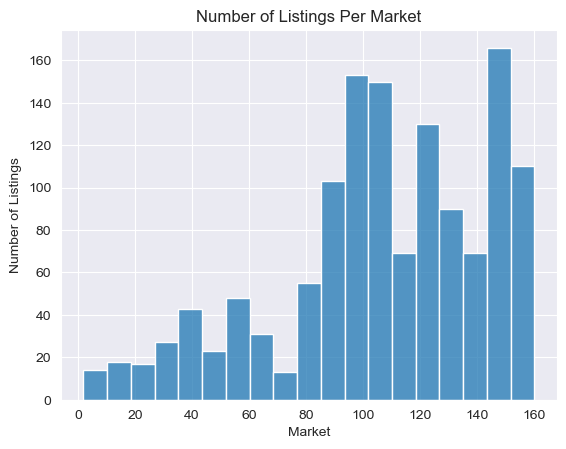

In [90]:
ax =sns.histplot (data=df5, x='cluster_hc')
plt.ylabel ("Number of Listings")
plt.xlabel ("Market")
plt.title("Number of Listings Per Market")
plt.savefig(Figures + "Number of Listings Per Market.png", bbox_inches='tight')

# 6.3 Summary statistics of listings per cluster

In [91]:
df5['cluster_hc'].value_counts()

150.0    50
91.0     47
126.0    40
125.0    35
149.0    33
         ..
90.0      1
23.0      1
56.0      1
79.0      1
29.0      1
Name: cluster_hc, Length: 155, dtype: int64

# Explanation for value_counts
Clustering basically brings together those listings that are quite close by the distance and than form one same cluster. This shows the id of the clusters and the number of clusters in the each id.

In [92]:
df5['cluster_hc'].describe()

count    1329.000000
mean      106.608728
std        37.198614
min         2.000000
25%        91.000000
50%       107.000000
75%       137.000000
max       160.000000
Name: cluster_hc, dtype: float64

# Explanation for further summary_statistics
The average number of listings in one cluster is 107, whereas the minimum are and maximum are 2 and 160 listings, respectively. 

# 6.4. Scatterplot of clusters

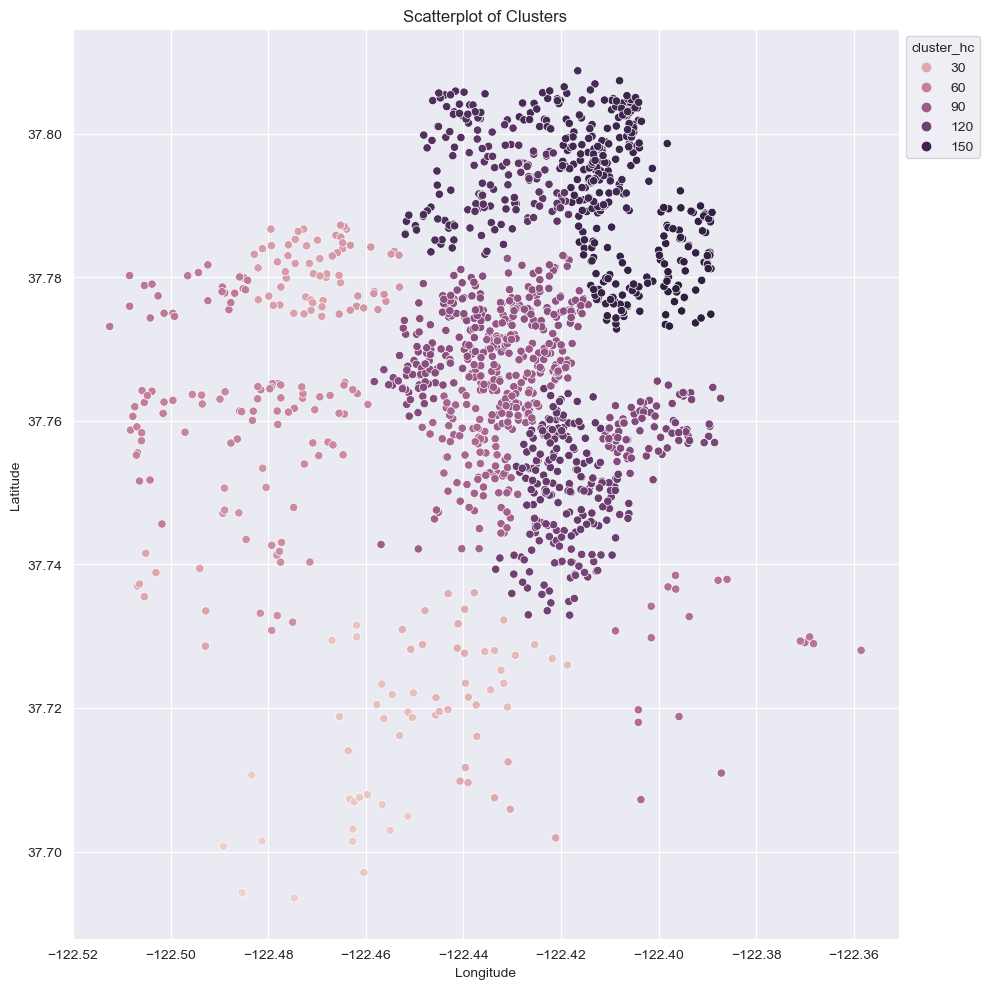

In [93]:
fig, axs = plt.subplots(figsize=(10,10), tight_layout = True)
sns.scatterplot(data=df4, x='longitude', y = 'latitude', hue='cluster_hc')
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))
plt.title ('Scatterplot of Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
fig.savefig (Figures + 'Scatterplot_of_Clusters.png', bbox_inches='tight')

## 7. Add the cluster ID to each listing and compute the mean price of the cluster and the number of listings in the cluster

Now that we have the cluster ID for each observation, we can compute the average price of the cluster together with the number of observations that are in a cluster. Create `df7` by merging `df6` with the dataframe that has the mean price per cluster and the number of listings per cluster.

In [94]:
df6.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price2', 'host_acceptance_rate2',
       'host_is_superhost2', 'n_listings', 'avg_price', 'superhost_status',
       'Distance_BH', 'Distance_LS', 'marker_color'],
      dtype='object')

In [95]:
#Dropping the marker_color column
df6=df6.drop(columns=['marker_color'], axis=1)

In [96]:
df6.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price2', 'host_acceptance_rate2',
       'host_is_superhost2', 'n_listings', 'avg_price', 'superhost_status',
       'Distance_BH', 'Distance_LS'],
      dtype='object')

In [97]:
df6 = pd.merge(df6,df4[['id','cluster_hc']], on='id', how ='left')
df6

id                                               name  \
0          958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1         5858.0                                 Creative Sanctuary   
2       494111.0                Comfortable space of your own in SF   
3       501770.0   Contemporary Home with Mid-Century Modern Design   
4       503362.0                Million Dollar Penthouse, Remodeled   
...          ...                                                ...   
1498  43354920.0                   Ultra Clean Studio Above The Bay   
1499  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
1500  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
1501         NaN                                     Bernel Heights   
1502         NaN                                     Lombard Street   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          8904.0 2009-03-02  San Francisco, CA                  70%   
2        252927.0 2010-10-04  San Francisco, CA                  87%   
3       2475480.0 2012-05-27  San Francisco, CA                  83%   
4       2475480.0 2012-05-27  San Francisco, CA                  83%   
...           ...        ...                ...                  ...   
1498  129165543.0 2017-05-06  San Francisco, CA                  NaN   
1499  200874180.0 2018-07-08  San Francisco, CA                  60%   
1500  261616147.0 2019-05-13  San Francisco, CA                   0%   
1501          NaN        NaT                NaN                  NaN   
1502          NaN        NaT                NaN                  NaN   

     host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                    t    Duboce Triangle       Western Addition  37.770280   
1                    f     Bernal Heights         Bernal Heights  37.744740   
2                    t     Outer Richmond         Outer Richmond  37.779880   
3                    t       Lower Haight         Haight Ashbury  37.772520   
4                    t       Lower Haight         Haight Ashbury  37.772650   
...                ...                ...                    ...        ...   
1498                 f                NaN         Crocker Amazon  37.701890   
1499                 f          Daly City             Ocean View  37.701410   
1500                 f          Daly City         Crocker Amazon  37.705900   
1501               NaN                NaN                    NaN  37.744385   
1502               NaN                NaN                    NaN  37.801945   

      ...  review_scores_value price2 host_acceptance_rate2  \
0     ...                 4.77  180.0                  0.98   
1     ...                 4.68  235.0                  0.70   
2     ...                 4.63  146.0                  0.87   
3     ...                 4.59  220.0                  0.83   
4     ...                 4.72  350.0                  0.83   
...   ...                  ...    ...                   ...   
1498  ...                 4.92   99.0                   NaN   
1499  ...                 4.73  108.0                  0.60   
1500  ...                 4.89  138.0                  0.00   
1501  ...                  NaN    NaN                   NaN   
1502  ...                  NaN    NaN                   NaN   

      host_is_superhost2  n_listings  avg_price superhost_status  Distance_BH  \
0                    1.0         1.0     180.00              1.0     3.209390   
1                    0.0         1.0     235.00              0.0     0.340289   
2                    1.0         2.0     248.00              2.0     7.150908   
3                    1.0         4.0     248.75              4.0     3.651191   
4                    1.0         4.0     248.75              4.0     3.668562   
...                  ...         ...        ...              ...          ...   
1498                 0.

# Making dataframe for cluster-level information

In [98]:
df_clusters = pd.DataFrame()

In [99]:
df_clusters ['cluster_hc']=clusters

In [100]:
df_clusters ['Avg_price_per_cluster']=df5.groupby(['cluster_hc']).agg({'price2':'mean'})

In [101]:
df_clusters ['Listings_per_cluster']=df5.groupby(['cluster_hc']).agg({'n_listings':'count'})

In [102]:
df_clusters

cluster_hc  Avg_price_per_cluster  Listings_per_cluster
0             94                    NaN                   NaN
1            118                    NaN                   NaN
2             64                  304.0                   1.0
3            103                  122.0                   1.0
4            103                  200.0                   1.0
...          ...                    ...                   ...
1496           6                    NaN                   NaN
1497           2                    NaN                   NaN
1498          31                    NaN                   NaN
1499           7                    NaN                   NaN
1500          29                    NaN                   NaN

[1501 rows x 3 columns]

In [103]:
df7 = pd.merge(df6,df_clusters[['cluster_hc','Avg_price_per_cluster','Listings_per_cluster']], on='cluster_hc', how ='left')
df7

id                                               name  \
0           958.0              Bright, Modern Garden Unit - 1BR/1BTH   
1           958.0              Bright, Modern Garden Unit - 1BR/1BTH   
2           958.0              Bright, Modern Garden Unit - 1BR/1BTH   
3           958.0              Bright, Modern Garden Unit - 1BR/1BTH   
4           958.0              Bright, Modern Garden Unit - 1BR/1BTH   
...           ...                                                ...   
28808  27232655.0     Lovely Apartment in a Convenient Area / Unit A   
28809  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
28810  34681471.0  ***QUIET GARDEN GETAWAY W/ BREATHTAKING SF VIE...   
28811         NaN                                     Bernel Heights   
28812         NaN                                     Lombard Street   

           host_id host_since      host_location host_acceptance_rate  \
0           1169.0 2008-07-31  San Francisco, CA                  98%   
1           1169.0 2008-07-31  San Francisco, CA                  98%   
2           1169.0 2008-07-31  San Francisco, CA                  98%   
3           1169.0 2008-07-31  San Francisco, CA                  98%   
4           1169.0 2008-07-31  San Francisco, CA                  98%   
...            ...        ...                ...                  ...   
28808  200874180.0 2018-07-08  San Francisco, CA                  60%   
28809  261616147.0 2019-05-13  San Francisco, CA                   0%   
28810  261616147.0 2019-05-13  San Francisco, CA                   0%   
28811          NaN        NaT                NaN                  NaN   
28812          NaN        NaT                NaN                  NaN   

      host_is_superhost host_neighbourhood neighbourhood_cleansed   latitude  \
0                     t    Duboce Triangle       Western Addition  37.770280   
1                     t    Duboce Triangle       Western Addition  37.770280   
2                     t    Duboce Triangle       Western Addition  37.770280   
3                     t    Duboce Triangle       Western Addition  37.770280   
4                     t    Duboce Triangle       Western Addition  37.770280   
...                 ...                ...                    ...        ...   
28808                 f          Daly City             Ocean View  37.701410   
28809                 f          Daly City         Crocker Amazon  37.705900   
28810                 f          Daly City         Crocker Amazon  37.705900   
28811               NaN                NaN                    NaN  37.744385   
28812               NaN                NaN                    NaN  37.801945   

       ...  host_acceptance_rate2 host_is_superhost2 n_listings  avg_price  \
0      ...                   0.98                1.0        1.0      180.0   
1      ...                   0.98                1.0        1.0      180.0   
2      ...                   0.98                1.0        1.0      180.0   
3      ...                   0.98                1.0        1.0      180.0   
4      ...                   0.98                1.0        1.0      180.0   
...    ...                    ...                ...        ...        ...   
28808  ...                   0.60                0.0        2.0      114.0   
28809  ...                   0.00                0.0        1.0      138.0   
28810  ...                   0.00                0.0        1.0      138.0   
28811  ...                    NaN                NaN        NaN        NaN   
28812  ...                    NaN                NaN        NaN        NaN   

       superhost_status  Distance_BH Distance_LS  cluster_hc  \
0                   1.0     3.209390    3.737870        94.0   
1                   1.0     3.209390    3.737870        94.0   
2                   1.0     3.209390    3.737870        94.0   
3                   1.0     3.209390    3.737870        94.0   
4                   1.0     3.209390    3.737870       

In [104]:
df7['Listings_per_cluster'].unique()

array([nan,  2.,  1.,  9., 16., 20.,  5.,  3., 26., 40.,  7.,  4., 17.,
       50., 13., 30.,  8., 14.,  6., 15., 25., 11., 10., 33., 22., 27.,
       21., 12., 23., 24., 47., 31., 19., 35.])

## 8. Re-estimating the linear regressions with the cluster-level information

Before we re-run the regressions, note that some clusters only have one observations. For these clusters, we cannot include the average price of the rivals in the regressions. We need to exclude these.

In [105]:
# Define `df8` as the subset of df7 that has more than 1 listing.
df8 = df7[df7["Listings_per_cluster"] > 1].reset_index()
df8=df8.drop(columns=['index'], axis=1)

In [106]:
df8

id                                               name  \
0     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
1     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
2     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
3     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
4     5.858000e+03                                 Creative Sanctuary   
...            ...                                                ...   
2315  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2316  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2317  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2318  6.521091e+17   Renovated stylish apartment in Lower Pac Heights   
2319  5.592754e+06         Luxury lower flat Marina, 1 block from Bay   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          1169.0 2008-07-31  San Francisco, CA                  98%   
2          1169.0 2008-07-31  San Francisco, CA                  98%   
3          1169.0 2008-07-31  San Francisco, CA                  98%   
4          8904.0 2009-03-02  San Francisco, CA                  70%   
...           ...        ...                ...                  ...   
2315     117615.0 2010-05-03  San Francisco, CA                 100%   
2316     117615.0 2010-05-03  San Francisco, CA                 100%   
2317     117615.0 2010-05-03  San Francisco, CA                 100%   
2318  106481882.0 2016-12-07  San Francisco, CA                  33%   
2319   28996560.0 2015-03-08  San Francisco, CA                  85%   

     host_is_superhost     host_neighbourhood neighbourhood_cleansed  \
0                    t        Duboce Triangle       Western Addition   
1                    t        Duboce Triangle       Western Addition   
2                    t        Duboce Triangle       Western Addition   
3                    t        Duboce Triangle       Western Addition   
4                    f         Bernal Heights         Bernal Heights   
...                ...                    ...                    ...   
2315                 f         Bernal Heights         Bernal Heights   
2316                 f         Bernal Heights         Bernal Heights   
2317                 f         Bernal Heights         Bernal Heights   
2318                 f  Lower Pacific Heights       Western Addition   
2319                 t                 Marina                 Marina   

      latitude  ...  host_acceptance_rate2 host_is_superhost2 n_listings  \
0     37.77028  ...                   0.98                1.0        1.0   
1     37.77028  ...                   0.98                1.0        1.0   
2     37.77028  ...                   0.98                1.0        1.0   
3     37.77028  ...                   0.98                1.0        1.0   
4     37.74474  ...                   0.70                0.0        1.0   
...        ...  ...                    ...                ...        ...   
2315  37.73916  ...                   1.00                0.0        1.0   
2316  37.73916  ...                   1.00                0.0        1.0   
2317  37.73916  ...                   1.00                0.0        1.0   
2318  37.78716  ...                   0.33                0.0        1.0   
2319  37.80566  ...                   0.85                1.0        3.0   

       avg_price  superhost_status  Distance_BH Distance_LS  cluster_hc  \
0     180.000000               1.0     3.209390    3.737870        94.0   
1     180.000000               1.0     3.209390    3.737870        94.0   
2     180.000000               1.0     3.209390    3.737870        94.0   
3     180.000000               1.0     3.209390    3.737870        94.0   
4     235.000000               0.0     0.340289    6.363329       118.0   
...          ...               ...          ..

In [107]:
# Define a new `panel2` dataframe, add the time fixed effect, define the indexes, and re-estimate the linear regressions.
panel2=df8[['host_id','bedrooms','beds','number_of_reviews','price2','review_scores_rating','host_is_superhost2','cluster_hc','n_listings','Avg_price_per_cluster','Listings_per_cluster','Distance_BH', 'Distance_LS']]
panel2['time']=1
panel2['log_price'] = np.log(panel2['price2'])
panel2.set_index(['host_id','time'], inplace=True)

/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3121915625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel2['time']=1
/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/3121915625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel2['log_price'] = np.log(panel2['price2'])


In [108]:
dependent = panel2.log_price

In [109]:
exog= sm.add_constant(panel2[['bedrooms', 'beds', 'number_of_reviews','review_scores_rating', 'host_is_superhost2', 'cluster_hc','n_listings','Distance_BH','Avg_price_per_cluster', 'Listings_per_cluster','Distance_LS']])

In [110]:
# Estimate the model without fixed effects and discuss your findings
modNFE = PanelOLS(dependent, exog, entity_effects=False)
resNFE = modNFE.fit(cov_type='unadjusted')
print(resNFE)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log_price   R-squared:                        0.3342
Estimator:                   PanelOLS   R-squared (Between):              0.3202
No. Observations:                1886   R-squared (Within):               0.0000
Date:                Mon, Sep 04 2023   R-squared (Overall):              0.3342
Time:                        15:22:58   Log-likelihood                   -783.96
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      85.515
Entities:                         656   P-value                           0.0000
Avg Obs:                       2.8750   Distribution:                 F(11,1874)
Min Obs:                       1.0000                                           
Max Obs:                       25.000   F-statistic (robust):             85.515
                            

/Users/aimanmalik/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Explanation for the model without fixed effects
The bedrooms are still statistically significant as p-value  of 0.00 is less than 0.05 and the confidence interval is (0.2633, 0.3313) and as the bedrooms increases by 1% the price increases by 29.73%. The number_of_reviews is statistically significant as p-value of 0.0003 is less than 0.05, and the confidence interval of (0.0002,0.0007) does not have zero. If the number of reviews increase by 1% is 0.05% which is quite less. If the host is a super host the price increases by 10.6% and it is statistically significant as p-value of 0.02 is less than 0.05 and the confidence interval does not contain zero in it. Both the distances and the clusters are statistically significant but they have a negative relation with price, which makes sense as clusters show the listings that are in the close proximity and if there are large number of listings in one cluster than that means that the rates have to be competitive and low to attract more tourists. The R-sqaured for this model is 33.4%, which means that the exogenous variables explain 33.4% of variation in the model.

In [111]:
# Estimate the model with fixed effects and discuss your findings
modFE = PanelOLS(dependent, exog,entity_effects=True, time_effects = False, drop_absorbed=True)
resFE = modFE.fit(cov_type='unadjusted')
print(resFE)

                          PanelOLS Estimation Summary                           
Dep. Variable:              log_price   R-squared:                        0.5407
Estimator:                   PanelOLS   R-squared (Between):              0.2151
No. Observations:                1886   R-squared (Within):               0.0000
Date:                Mon, Sep 04 2023   R-squared (Overall):              0.2387
Time:                        15:23:25   Log-likelihood                    2516.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      159.74
Entities:                         656   P-value                           0.0000
Avg Obs:                       2.8750   Distribution:                  F(9,1221)
Min Obs:                       1.0000                                           
Max Obs:                       25.000   F-statistic (robust):             159.74
                            

/Users/aimanmalik/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/var/folders/7w/jnf43zzx39dcc9vyx3gqrcqh0000gn/T/ipykernel_24240/1492140481.py:3: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

host_is_superhost2, n_listings

  resFE = modFE.fit(cov_type='unadjusted')


# Estimating the model without fixed effects and discussing the findings
The variables of superhost status and the number of listings have been absorbed completely by the model. However, the bedrooms are still statistically significant as p-value of 0.00 is less than 0.05 and confidence interval of (0.2359, 0.280) does not contain 0 and hence if the bedrooms increase by 1% the price increases by 25.8%. The number_of_reviews is statistically significant but the increase in price is 0.01% if the number of reviews increase by 1%. The clusters_hc shows that if thehy the number of listings in a cluster increases by 1% the price increases by 0.18%. However, rest of the variables are not statistically significant as the p-values are greater than 0.05 the confidence intervals does contain zero. The R-sqaured for this model is 23.9%, which means that the exogenous variables only explain 23.9% variation in the log of price. 

## 9. Machine learning application

We'll now turn to the last part of the analysis. First, we create a new variable that takes the value of one if the price of a listing is above the mean price of that of the market. Note that for clusters with a single listing this is not useful so we'll continue to work with the subset of the data that doesn't have clusters with a single listing. Note, also, that we'll need to clean and scale some variables before we can turn to predicting prices.

In [112]:
df8['above_mean']= np.select([df8["price2"]>df8['Avg_price_per_cluster'], df8['price2']<df8['Avg_price_per_cluster']],[0,1])

In [113]:
df8

id                                               name  \
0     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
1     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
2     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
3     9.580000e+02              Bright, Modern Garden Unit - 1BR/1BTH   
4     5.858000e+03                                 Creative Sanctuary   
...            ...                                                ...   
2315  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2316  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2317  6.471149e+17  Private, Comfy, Bright, 2-bedroom Bernal Sanct...   
2318  6.521091e+17   Renovated stylish apartment in Lower Pac Heights   
2319  5.592754e+06         Luxury lower flat Marina, 1 block from Bay   

          host_id host_since      host_location host_acceptance_rate  \
0          1169.0 2008-07-31  San Francisco, CA                  98%   
1          1169.0 2008-07-31  San Francisco, CA                  98%   
2          1169.0 2008-07-31  San Francisco, CA                  98%   
3          1169.0 2008-07-31  San Francisco, CA                  98%   
4          8904.0 2009-03-02  San Francisco, CA                  70%   
...           ...        ...                ...                  ...   
2315     117615.0 2010-05-03  San Francisco, CA                 100%   
2316     117615.0 2010-05-03  San Francisco, CA                 100%   
2317     117615.0 2010-05-03  San Francisco, CA                 100%   
2318  106481882.0 2016-12-07  San Francisco, CA                  33%   
2319   28996560.0 2015-03-08  San Francisco, CA                  85%   

     host_is_superhost     host_neighbourhood neighbourhood_cleansed  \
0                    t        Duboce Triangle       Western Addition   
1                    t        Duboce Triangle       Western Addition   
2                    t        Duboce Triangle       Western Addition   
3                    t        Duboce Triangle       Western Addition   
4                    f         Bernal Heights         Bernal Heights   
...                ...                    ...                    ...   
2315                 f         Bernal Heights         Bernal Heights   
2316                 f         Bernal Heights         Bernal Heights   
2317                 f         Bernal Heights         Bernal Heights   
2318                 f  Lower Pacific Heights       Western Addition   
2319                 t                 Marina                 Marina   

      latitude  ...  host_is_superhost2 n_listings   avg_price  \
0     37.77028  ...                 1.0        1.0  180.000000   
1     37.77028  ...                 1.0        1.0  180.000000   
2     37.77028  ...                 1.0        1.0  180.000000   
3     37.77028  ...                 1.0        1.0  180.000000   
4     37.74474  ...                 0.0        1.0  235.000000   
...        ...  ...                 ...        ...         ...   
2315  37.73916  ...                 0.0        1.0  192.000000   
2316  37.73916  ...                 0.0        1.0  192.000000   
2317  37.73916  ...                 0.0        1.0  192.000000   
2318  37.78716  ...                 0.0        1.0  265.000000   
2319  37.80566  ...                 1.0        3.0  230.333333   

      superhost_status  Distance_BH  Distance_LS cluster_hc  \
0                  1.0     3.209390     3.737870       94.0   
1                  1.0     3.209390     3.737870       94.0   
2                  1.0     3.209390     3.737870       94.0   
3                  1.0     3.209390     3.737870       94.0   
4                  0.0     0.340289     6.363329      118.0   
...                ...          ...          ...        ...   
2315               0.0     0.707222     7.004227      115.0   
2316               0.0     0.707222     7.004227      115.0   
2317               0.0     0.707222     7.004227 

In [114]:
#Counting the clusters that have avg_price greater than per listing average price
df8['above_mean'].value_counts()

1    1352
0     968
Name: above_mean, dtype: int64

# 9.1. We need to clean the data a bit more

First, drop `name`, `host_since`, `host_location`, `host_neighbourhood`, `neighbourhood_cleansed` and `host_acceptance_rate2` as we won't use them. Also drop `host_id`, `accommodates`, `bedrooms` and rows that have missing prices or missing `review_scores_rating`. Finally, of all the `review*` columns, keep `review_scores_rating` only and drop observations for which the `host_is_superhost2` variable is missing..

In [115]:
df8.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price2', 'host_acceptance_rate2',
       'host_is_superhost2', 'n_listings', 'avg_price', 'superhost_status',
       'Distance_BH', 'Distance_LS', 'cluster_hc', 'Avg_price_per_cluster',
       'Listings_per_cluster', 'above_mean'],
      dtype='object')

In [116]:
 df8.drop(columns=['id','host_id','name', 'host_location','host_neighbourhood','host_is_superhost','host_since',
       'neighbourhood_cleansed','review_scores_accuracy',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','accommodates', 'bedrooms','host_acceptance_rate','host_acceptance_rate2','price'], inplace=True)

In [117]:
df8 = df8.dropna( how='all',subset=['review_scores_rating'])

In [118]:
df8 = df8.dropna( how='all',subset=['beds'])

In [119]:
# Define `df9` by taking `df8` and dropping the variables descrbed above.
df8 = df8.dropna( how='all',subset=['price2', 'review_scores_rating','Avg_price_per_cluster','avg_price','host_is_superhost2'])

In [120]:
df8

latitude   longitude              property_type        room_type  beds  \
0     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
1     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
2     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
3     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
4     37.74474 -122.420890         Entire rental unit  Entire home/apt   2.0   
...        ...         ...                        ...              ...   ...   
2315  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2316  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2317  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2318  37.78716 -122.441783         Entire rental unit  Entire home/apt   2.0   
2319  37.80566 -122.445030         Entire rental unit  Entire home/apt   2.0   

      minimum_nights  maximum_nights  number_of_reviews  review_scores_rating  \
0                2.0            30.0              358.0                  4.86   
1                2.0            30.0              358.0                  4.86   
2                2.0            30.0              358.0                  4.86   
3                2.0            30.0              358.0                  4.86   
4               30.0            60.0              111.0                  4.88   
...              ...             ...                ...                   ...   
2315            30.0           365.0                1.0                  5.00   
2316            30.0           365.0                1.0                  5.00   
2317            30.0           365.0                1.0                  5.00   
2318            30.0           120.0                1.0                  5.00   
2319            30.0          1125.0                6.0                  5.00   

      price2  host_is_superhost2  n_listings   avg_price  superhost_status  \
0      180.0                 1.0         1.0  180.000000               1.0   
1      180.0                 1.0         1.0  180.000000               1.0   
2      180.0                 1.0         1.0  180.000000               1.0   
3      180.0                 1.0         1.0  180.000000               1.0   
4      235.0                 0.0         1.0  235.000000               0.0   
...      ...                 ...         ...         ...               ...   
2315   192.0                 0.0         1.0  192.000000               0.0   
2316   192.0                 0.0         1.0  192.000000               0.0   
2317   192.0                 0.0         1.0  192.000000               0.0   
2318   265.0                 0.0         1.0  265.000000               0.0   
2319   283.0                 1.0         3.0  230.333333               3.0   

      Distance_BH  Distance_LS  cluster_hc  Avg_price_per_cluster  \
0        3.209390     3.737870        94.0             155.500000   
1        3.209390     3.737870        94.0             124.777778   
2        3.209390     3.737870        94.0             177.875000   
3        3.209390     3.737870        94.0             165.250000   
4        0.340289     6.363329       118.0             171.000000   
...           ...          ...         ...                    ...   
2315     0.707222     7.004227       115.0             179.400000   
2316     0.707222     7.004227       115.0             221.000000   
2317     0.707222     7.004227       115.0             201.466667   
2318     5.229831     2.597753       141.0             231.838710   
2319     7.243804     2.333257       138.0             247.428571   

      Listings_per_cluster  above_mean  
0                      2.0           0  
1                      9.0           0  
2                     16.0           0  
3                     20.0           0  
4                      5.0           0  
...                    ...         ...  
2315               

In [121]:
df8.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'price2', 'host_is_superhost2', 'n_listings',
       'avg_price', 'superhost_status', 'Distance_BH', 'Distance_LS',
       'cluster_hc', 'Avg_price_per_cluster', 'Listings_per_cluster',
       'above_mean'],
      dtype='object')

In [122]:
df9=df8

In [123]:
df9.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'price2', 'host_is_superhost2', 'n_listings',
       'avg_price', 'superhost_status', 'Distance_BH', 'Distance_LS',
       'cluster_hc', 'Avg_price_per_cluster', 'Listings_per_cluster',
       'above_mean'],
      dtype='object')

In [127]:
df9.isnull().sum()

#This shows that there is no null value in any of the columns. 

latitude                 0
longitude                0
property_type            0
room_type                0
beds                     0
minimum_nights           0
maximum_nights           0
number_of_reviews        0
review_scores_rating     0
price2                   0
host_is_superhost2       0
n_listings               0
avg_price                0
superhost_status         0
Distance_BH              0
Distance_LS              0
time                     0
cluster_hc               0
Avg_price_per_cluster    0
Listings_per_cluster     0
above_mean               0
dtype: int64

# 9.2. Create categorical variables

We now have to scale numeric variables to be between 0 and 1, and turn strings into exclusive dummy variables. There will be one difference, however. Instead of creating boolean variables for the `property_type`, we'll create binary variables. This is, instead of the variable saying `True` or `False`, it should have a `1` or a `0`. We'll do this because some methods do not handle boolean variables well. To do this, use `np.where()` as follows.

Assume you have a dataframe called `dX` that has a column called `type` that takes three possible values: `a`, `b`, and `c`. Then, you would create three binary indicators called, for example `dX['da']`, `dX['db']`, and `dX['dc']` by doing `dX['da'] = np.where(dX['type'] == 'a', 1, 0)` where the order of the arguments says "if the condition `dX['type'] == 'a'` is true, then put a 1 in the new variable `dX['da']` and a 0 otherwise. Adapt this to your case and use this to create `df10`. After you have done this, scale all the other numeric variables in `df10` to be between 0 and 1.

In [124]:
#Determining the types of the variables to see which are the categorical one.
df9.dtypes

latitude                 float64
longitude                float64
property_type             object
room_type                 object
beds                     float64
minimum_nights           float64
maximum_nights           float64
number_of_reviews        float64
review_scores_rating     float64
price2                   float64
host_is_superhost2       float64
n_listings               float64
avg_price                float64
superhost_status         float64
Distance_BH              float64
Distance_LS              float64
cluster_hc               float64
Avg_price_per_cluster    float64
Listings_per_cluster     float64
above_mean                 int64
dtype: object

In [125]:
df9.property_type.value_counts()

Entire rental unit           1325
Entire condo                  579
Entire townhouse               56
Entire serviced apartment      49
Entire guesthouse              35
Entire bungalow                 7
Name: property_type, dtype: int64

In [126]:
df9['P1'] = np.where(df9['property_type'] == 'Entire rental unit ', 1, 0)
df9['P2'] = np.where(df9['property_type'] == 'Entire condo ', 1, 0)
df9['P3'] = np.where(df9['property_type'] == 'Entire serviced apartment ', 1, 0)
df9['P4'] = np.where(df9['property_type'] == 'Entire guesthouse ', 1, 0)
df9['P5'] = np.where(df9['property_type'] == 'Entire townhouse  ', 1, 0)
df9['P6'] = np.where(df9['property_type'] == 'Entire bungalow  ', 1, 0)

In [127]:
df9['R1'] = np.where(df9['room_type'] == 'Entire home/apt ', 1, 0)

In [128]:
df9.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'price2', 'host_is_superhost2', 'n_listings',
       'avg_price', 'superhost_status', 'Distance_BH', 'Distance_LS',
       'cluster_hc', 'Avg_price_per_cluster', 'Listings_per_cluster',
       'above_mean', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1'],
      dtype='object')

In [129]:
df9

latitude   longitude              property_type        room_type  beds  \
0     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
1     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
2     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
3     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   2.0   
4     37.74474 -122.420890         Entire rental unit  Entire home/apt   2.0   
...        ...         ...                        ...              ...   ...   
2315  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2316  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2317  37.73916 -122.412460         Entire rental unit  Entire home/apt   2.0   
2318  37.78716 -122.441783         Entire rental unit  Entire home/apt   2.0   
2319  37.80566 -122.445030         Entire rental unit  Entire home/apt   2.0   

      minimum_nights  maximum_nights  number_of_reviews  review_scores_rating  \
0                2.0            30.0              358.0                  4.86   
1                2.0            30.0              358.0                  4.86   
2                2.0            30.0              358.0                  4.86   
3                2.0            30.0              358.0                  4.86   
4               30.0            60.0              111.0                  4.88   
...              ...             ...                ...                   ...   
2315            30.0           365.0                1.0                  5.00   
2316            30.0           365.0                1.0                  5.00   
2317            30.0           365.0                1.0                  5.00   
2318            30.0           120.0                1.0                  5.00   
2319            30.0          1125.0                6.0                  5.00   

      price2  ...  Avg_price_per_cluster  Listings_per_cluster  above_mean  \
0      180.0  ...             155.500000                   2.0           0   
1      180.0  ...             124.777778                   9.0           0   
2      180.0  ...             177.875000                  16.0           0   
3      180.0  ...             165.250000                  20.0           0   
4      235.0  ...             171.000000                   5.0           0   
...      ...  ...                    ...                   ...         ...   
2315   192.0  ...             179.400000                   5.0           0   
2316   192.0  ...             221.000000                   7.0           1   
2317   192.0  ...             201.466667                  30.0           1   
2318   265.0  ...             231.838710                  31.0           0   
2319   283.0  ...             247.428571                   7.0           0   

      P1  P2  P3  P4  P5  P6  R1  
0      0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0  
2      0   0   0   0   0   0   0  
3      0   0   0   0   0   0   0  
4      0   0   0   0   0   0   0  
...   ..  ..  ..  ..  ..  ..  ..  
2315   0   0   0   0   0   0   0  
2316   0   0   0   0   0   0   0  
2317   0   0   0   0   0   0   0  
2318   0   0   0   0   0   0   0  
2319   0   0   0   0   0   0   0  

[2051 rows x 27 columns]

In [130]:
cols = df9.columns

In [131]:
cols

Index(['latitude', 'longitude', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'price2', 'host_is_superhost2', 'n_listings',
       'avg_price', 'superhost_status', 'Distance_BH', 'Distance_LS',
       'cluster_hc', 'Avg_price_per_cluster', 'Listings_per_cluster',
       'above_mean', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1'],
      dtype='object')

In [132]:
cols = cols.drop(['longitude','latitude','property_type', 'room_type','P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1','above_mean'])

In [133]:
df10 = df9.copy(deep=False)

In [134]:
for var in cols:
    df10[var] = (df9[var] - np.min(df9[var]))/(np.max(df9[var]) - np.min(df9[var]))

In [135]:
df10

latitude   longitude              property_type        room_type  \
0     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   
1     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   
2     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   
3     37.77028 -122.433170  Entire serviced apartment  Entire home/apt   
4     37.74474 -122.420890         Entire rental unit  Entire home/apt   
...        ...         ...                        ...              ...   
2315  37.73916 -122.412460         Entire rental unit  Entire home/apt   
2316  37.73916 -122.412460         Entire rental unit  Entire home/apt   
2317  37.73916 -122.412460         Entire rental unit  Entire home/apt   
2318  37.78716 -122.441783         Entire rental unit  Entire home/apt   
2319  37.80566 -122.445030         Entire rental unit  Entire home/apt   

          beds  minimum_nights  maximum_nights  number_of_reviews  \
0     0.166667        0.002740        0.002900           0.553488   
1     0.166667        0.002740        0.002900           0.553488   
2     0.166667        0.002740        0.002900           0.553488   
3     0.166667        0.002740        0.002900           0.553488   
4     0.166667        0.079452        0.005901           0.170543   
...        ...             ...             ...                ...   
2315  0.166667        0.079452        0.036404           0.000000   
2316  0.166667        0.079452        0.036404           0.000000   
2317  0.166667        0.079452        0.036404           0.000000   
2318  0.166667        0.079452        0.011901           0.000000   
2319  0.166667        0.079452        0.112411           0.007752   

      review_scores_rating    price2  ...  Avg_price_per_cluster  \
0                    0.972  0.173570  ...               0.113725   
1                    0.972  0.173570  ...               0.033406   
2                    0.972  0.173570  ...               0.172222   
3                    0.972  0.173570  ...               0.139216   
4                    0.976  0.282051  ...               0.154248   
...                    ...       ...  ...                    ...   
2315                 1.000  0.197239  ...               0.176209   
2316                 1.000  0.197239  ...               0.284967   
2317                 1.000  0.197239  ...               0.233900   
2318                 1.000  0.341223  ...               0.313304   
2319                 1.000  0.376726  ...               0.354062   

      Listings_per_cluster  above_mean  P1  P2  P3  P4  P5  P6  R1  
0                 0.000000           0   0   0   0   0   0   0   0  
1                 0.145833           0   0   0   0   0   0   0   0  
2                 0.291667           0   0   0   0   0   0   0   0  
3                 0.375000           0   0   0   0   0   0   0   0  
4                 0.062500           0   0   0   0   0   0   0   0  
...                    ...         ...  ..  ..  ..  ..  ..  ..  ..  
2315              0.062500           0   0   0   0   0   0   0   0  
2316              0.104167           1   0   0   0   0   0   0   0  
2317              0.583333           1   0   0   0   0   0   0   0  
2318              0.604167           0   0   0   0   0   0   0   0  
2319              0.104167           0   0   0   0   0   0   0   0  

[2051 rows x 27 columns]

Finally, add a column to `df10` that will identify a price above the mean of the cluster.

Now we can turn to splitting the data.

# 9.3. Load relevant modules, split the data, and define the problems

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
train_df, test_df = train_test_split(df10, test_size = 0.2, random_state = 1)

We'll estimate the default Ridge, Lasso, Decision Tree, and Random Forest regressors, and compute the relevant performance measure for each of them using 10-K fold cross-validation. Then we'll use a grid of parameters to find the best specification for each of them. Finally, we'll use a Decision Tree and a Random Forest classifier to predict whether the price of a listing will be above the mean of the cluster. 

In [138]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.tree import export_graphviz

In [143]:
df10.columns

Index(['latitude', 'longitude', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'price2', 'host_is_superhost2', 'n_listings',
       'avg_price', 'superhost_status', 'Distance_BH', 'Distance_LS', 'time',
       'cluster_hc', 'Avg_price_per_cluster', 'Listings_per_cluster',
       'above_mean', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1'],
      dtype='object')

In [139]:
# Note: 'dist_loc1','dist_loc2' correspond to the variables that contain the distance from listings to the touristic locations 1 and 2.

label_train = train_df['price2']
features_train = train_df[['beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'host_is_superhost2', 'n_listings','avg_price', 'Listings_per_cluster', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1','Distance_BH', 'Distance_LS']]

label_test = test_df['price2']
features_test = test_df[['beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'host_is_superhost2', 'n_listings','avg_price', 'Listings_per_cluster', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'R1','Distance_BH', 'Distance_LS']]



## 9.3.1. Training the models (Regression)

In [140]:
# Define and train a default Ridge regression model
ridge_reg = Ridge()
ridge_reg.fit(features_train, label_train)

Ridge()

In [141]:
# Define and train a default Lasso regression model
lasso_reg = Lasso()
lasso_reg.fit(features_train, label_train)

Lasso()

In [142]:
# Define and train a default Decision Tree regression model
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(features_train, label_train)

DecisionTreeRegressor()

In [143]:
# Define and train a default Random Forests regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(features_train,label_train)

RandomForestRegressor()

In [144]:
# We'll use the same cross validation setting for all cases
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [145]:
# Use cross validation for the four models you estimated above.
ridge_scores = cross_val_score(ridge_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_scores

array([-0.00218722, -0.00166209, -0.00380497, -0.00175508, -0.00215273,
       -0.00168705, -0.00143234, -0.00358243, -0.00383395, -0.00108199,
       -0.00164753, -0.0008966 , -0.00221496, -0.00083284, -0.00262044,
       -0.00245685, -0.00386785, -0.00377899, -0.00230503, -0.00269526,
       -0.00201275, -0.00123883, -0.00118257, -0.00168714, -0.00161672,
       -0.00685016, -0.0016657 , -0.0026709 , -0.0015205 , -0.00273283])

In [146]:
# Use cross validation for the four models you estimated above.
lasso_scores = cross_val_score(lasso_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_scores

array([-0.03631126, -0.04463972, -0.04272554, -0.04475838, -0.0543815 ,
       -0.04704947, -0.05105211, -0.05288794, -0.04999191, -0.05573676,
       -0.05690746, -0.04594772, -0.04809124, -0.0405481 , -0.04350329,
       -0.03873441, -0.0476743 , -0.04426227, -0.05521127, -0.05860492,
       -0.05301781, -0.03777929, -0.05470104, -0.06328061, -0.03943253,
       -0.05220293, -0.04803269, -0.03871032, -0.04771754, -0.04546937])

In [147]:
# Use cross validation for the four models you estimated above.
dtree_scores = cross_val_score(dtree_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
dtree_scores

array([-0.00159413, -0.0009387 , -0.00117938, -0.00146862, -0.00095737,
       -0.00052583, -0.00049305, -0.0026029 , -0.00066285, -0.00046999,
       -0.00098349, -0.00052716, -0.0003664 , -0.00045324, -0.00040369,
       -0.00455233, -0.00102121, -0.00229668, -0.0049822 , -0.00189105,
       -0.00071261, -0.00097054, -0.00081763, -0.00147251, -0.00188903,
       -0.00132992, -0.00071869, -0.00161872, -0.00037954, -0.00072253])

In [148]:
# Use cross validation for the four models you estimated above.
rf_scores = cross_val_score(rf_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
rf_scores

array([-0.00156632, -0.00146221, -0.00164921, -0.00116905, -0.000667  ,
       -0.00048121, -0.00069891, -0.00350043, -0.00107342, -0.00027757,
       -0.00050218, -0.00034212, -0.00028696, -0.00016184, -0.00037625,
       -0.0016418 , -0.00097416, -0.00305975, -0.00262293, -0.00241873,
       -0.00037446, -0.00113918, -0.00043149, -0.00103242, -0.00198605,
       -0.00368378, -0.0006479 , -0.00110795, -0.00065667, -0.00039894])

In [149]:
# Compute the absolute value of the scores of all models
ridge_scores = np.abs(ridge_scores)
ridge_scores

array([0.00218722, 0.00166209, 0.00380497, 0.00175508, 0.00215273,
       0.00168705, 0.00143234, 0.00358243, 0.00383395, 0.00108199,
       0.00164753, 0.0008966 , 0.00221496, 0.00083284, 0.00262044,
       0.00245685, 0.00386785, 0.00377899, 0.00230503, 0.00269526,
       0.00201275, 0.00123883, 0.00118257, 0.00168714, 0.00161672,
       0.00685016, 0.0016657 , 0.0026709 , 0.0015205 , 0.00273283])

In [150]:
# Compute the absolute value of the scores of all models
lasso_scores= np.abs(lasso_scores)
lasso_scores

array([0.03631126, 0.04463972, 0.04272554, 0.04475838, 0.0543815 ,
       0.04704947, 0.05105211, 0.05288794, 0.04999191, 0.05573676,
       0.05690746, 0.04594772, 0.04809124, 0.0405481 , 0.04350329,
       0.03873441, 0.0476743 , 0.04426227, 0.05521127, 0.05860492,
       0.05301781, 0.03777929, 0.05470104, 0.06328061, 0.03943253,
       0.05220293, 0.04803269, 0.03871032, 0.04771754, 0.04546937])

In [151]:
# Compute the absolute value of the scores of all models
dtree_scores= np.abs(dtree_scores)
dtree_scores

array([0.00159413, 0.0009387 , 0.00117938, 0.00146862, 0.00095737,
       0.00052583, 0.00049305, 0.0026029 , 0.00066285, 0.00046999,
       0.00098349, 0.00052716, 0.0003664 , 0.00045324, 0.00040369,
       0.00455233, 0.00102121, 0.00229668, 0.0049822 , 0.00189105,
       0.00071261, 0.00097054, 0.00081763, 0.00147251, 0.00188903,
       0.00132992, 0.00071869, 0.00161872, 0.00037954, 0.00072253])

In [152]:
# Compute the absolute value of the scores of all models
rf_scores= np.abs(rf_scores)
rf_scores

array([0.00156632, 0.00146221, 0.00164921, 0.00116905, 0.000667  ,
       0.00048121, 0.00069891, 0.00350043, 0.00107342, 0.00027757,
       0.00050218, 0.00034212, 0.00028696, 0.00016184, 0.00037625,
       0.0016418 , 0.00097416, 0.00305975, 0.00262293, 0.00241873,
       0.00037446, 0.00113918, 0.00043149, 0.00103242, 0.00198605,
       0.00368378, 0.0006479 , 0.00110795, 0.00065667, 0.00039894])

In [153]:
# What is the mean MSE (and its standard error) for the Ridge model
print('Mean MSE: %.3f (%.3f)' % (np.mean(ridge_scores), np.std(ridge_scores)))

Mean MSE: 0.002 (0.001)


In [154]:
# What is the mean MSE (and its standard error) for the Lasso model
print('Mean MSE: %.3f (%.3f)' % (np.mean(lasso_scores), np.std(lasso_scores)))

Mean MSE: 0.048 (0.007)


In [155]:
# What is the mean MSE (and its standard error) for the Decision Tree model
print('Mean MSE: %.3f (%.3f)' % (np.mean(dtree_scores), np.std(dtree_scores)))

Mean MSE: 0.001 (0.001)


In [156]:
# What is the mean MSE (and its standard error) for the Random Forests model
print('Mean MSE: %.3f (%.3f)' % (np.mean(rf_scores), np.std(rf_scores)))

Mean MSE: 0.001 (0.001)


## 9.3.2 Prediction on test data

In [157]:
# Predict the outcome variable (the "label") of the test dataset for each model 
ridge_prices = ridge_reg.predict(features_test)
lasso_prices = lasso_reg.predict(features_test)
dtree_prices = dtree_reg.predict(features_test)
rf_prices = rf_reg.predict(features_test)

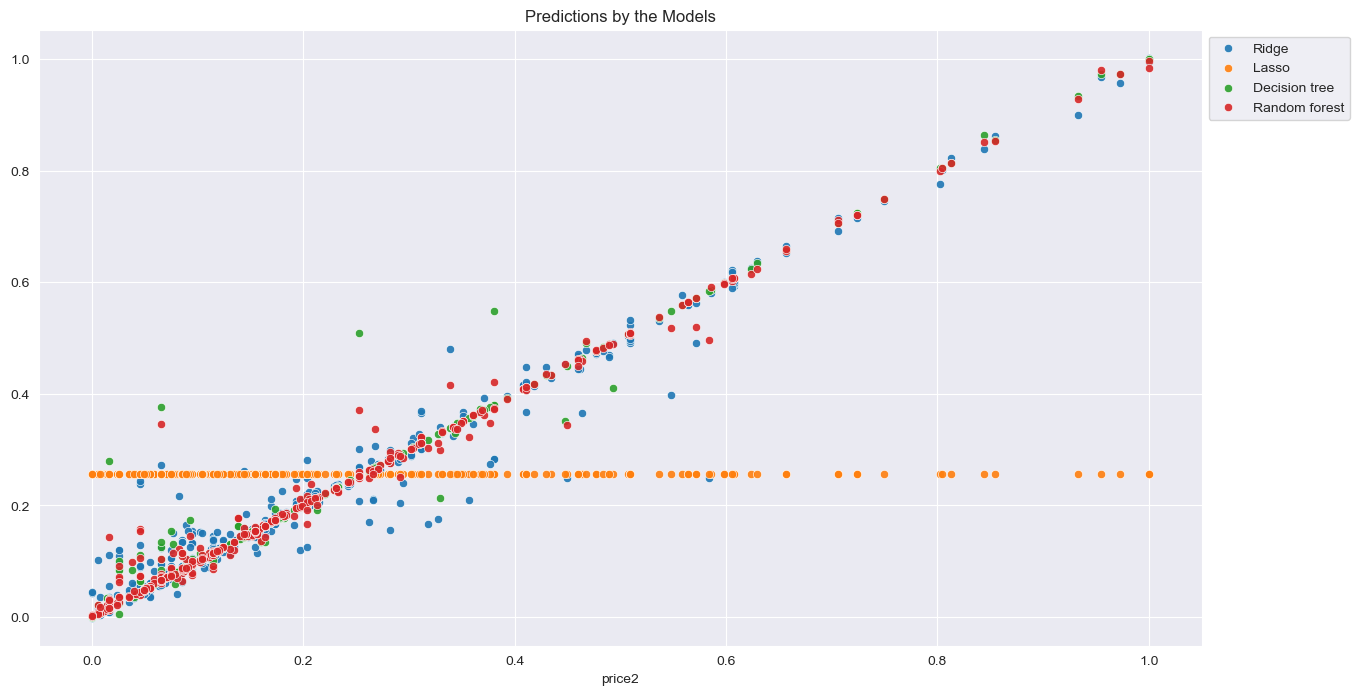

In [158]:
# Put all predictions in one plot, with the realized value on the horizontal axis and the predictions in the vertical axis. What do you learn?
fig, axs = plt.subplots(figsize=(15,8))
sns.scatterplot(x = label_test, y = ridge_prices, label = r'Ridge', alpha = 0.9)
sns.scatterplot(x = label_test, y = lasso_prices, label = r'Lasso', alpha = 0.9)
sns.scatterplot(x = label_test, y = dtree_prices, label = r'Decision tree', alpha = 0.9)
sns.scatterplot(x = label_test, y = rf_prices, label = r'Random forest', alpha = 0.9)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))
plt.title("Predictions by the Models")
plt.show()
fig.get_figure().savefig(Figures + 'Predictions.png', bbox_inches='tight')

# Explanation for the graph
We can see that the model of Ridge (Blue) and Random Forest (Red) explain the variation in price in quite similar manner. it shows that the price has an increasing trend. However, the values predicted by random forest are better as there is less variation in the values that it predicts and they are more or less in a upwards sloping line. Whereas, the values predicted by ridge are more scattered as compared to ridge. The Decision Tree (Green) also follow the similar trend of updward sloping however the values are much more scattered. We can also see that the values are more concentrated towards the origin. Lasso does not predict the regression well as it has a straight line. 

## 9.3.3. Finding the best specification of each algorithm 

In this section, I'll provide some guidance on the grids that you should use.

In [159]:
# Define grid for Ridge and Lasso
grid_rl = dict()
grid_rl['alpha'] = np.arange(0.01, 1, 0.05)

In [160]:
ridge_reg_cv = Ridge()
lasso_reg_cv =Lasso()

In [161]:
# Define the searches
searchR = GridSearchCV(ridge_reg_cv, grid_rl, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
searchL = GridSearchCV(lasso_reg_cv, grid_rl, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [162]:
# Perform the searches
resultsR = searchR.fit(features_train,label_train)
resultsL = searchL.fit(features_train,label_train)

In [163]:
# Print the MSE, its standard error, and the best parameter configuration for each model.
print('MSE: %.3f' % np.abs(resultsR.best_score_))
print('Config: %s' % resultsR.best_params_)

MSE: 0.002
Config: {'alpha': 0.060000000000000005}


In [164]:
# Print the MSE, its standard error, and the best parameter configuration for each model.
print('MSE: %.3f' % np.abs(resultsL.best_score_))
print('Config: %s' % resultsL.best_params_)

MSE: 0.005
Config: {'alpha': 0.01}


We'll now turn to the Decision Tree and Random Forests. To keep things simple, we'll focus on two hyperparameters of decision trees: the `max_depth` and `max_features`. We'll add a third parameter for the Random Forests. Use the following grid to find the best specification.

In [165]:
# Hyperparamters to form the grid
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(start = 4, stop = 6, num = 3)]

In [166]:
dt_grid = {'max_features': max_features,'max_depth':max_depth}

In [167]:
# For the random forest model, we'll add a hyperparameter to the search
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 400, num = 5)]

In [168]:
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [169]:
# Define the `GridSearchCV` problem and perform the search.
grid_search_dt = GridSearchCV(dtree_reg, dt_grid, cv =10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_dt

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['sqrt']},
             scoring='neg_mean_squared_error')

In [170]:
# Define the `GridSearchCV` problem and perform the search.
grid_search_rf= GridSearchCV(rf_reg, rf_grid, cv =10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_rf

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['sqrt'],
                         'n_estimators': [300, 325, 350, 375, 400]},
             scoring='neg_mean_squared_error')

In [171]:
resultsdt = grid_search_dt.fit(features_train,label_train)
resultsrf = grid_search_rf.fit(features_train,label_train)

In [172]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters. 
# Print the MSE, its standard error, and the best hyperparameter configuration
print('MSE: %.3f' % np.std(resultsdt.best_score_))
print('Config: %s' % resultsdt.best_params_)

MSE: 0.000
Config: {'max_depth': 5, 'max_features': 'sqrt'}


In [173]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters. 
# Print the MSE, its standard error, and the best hyperparameter configuration
print('MSE: %.3f' % np.std(resultsrf.best_score_))
print('Config: %s' % resultsrf.best_params_)

MSE: 0.000
Config: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}


In [174]:
# Predict the label of the test dataset for each model. Remember that you need to re-define the problems with the best hyperparameter configuration and re-train as well, before prediction
reg_dt2 = DecisionTreeRegressor(max_depth = 6, max_features = 'sqrt')
reg_dt2 = reg_dt2.fit(features_train,label_train)


In [175]:
# Predict the label of the test dataset for each model. Remember that you need to re-define the problems with the best hyperparameter configuration and re-train as well, before prediction
red_rf2 = RandomForestRegressor(max_depth = 6, max_features = 'sqrt', n_estimators = 325)
reg_rf2 = red_rf2.fit(features_train,label_train)

In [176]:
dtree_prices2 = reg_dt2.predict(features_test)
rf_prices2 = reg_rf2.predict(features_test)

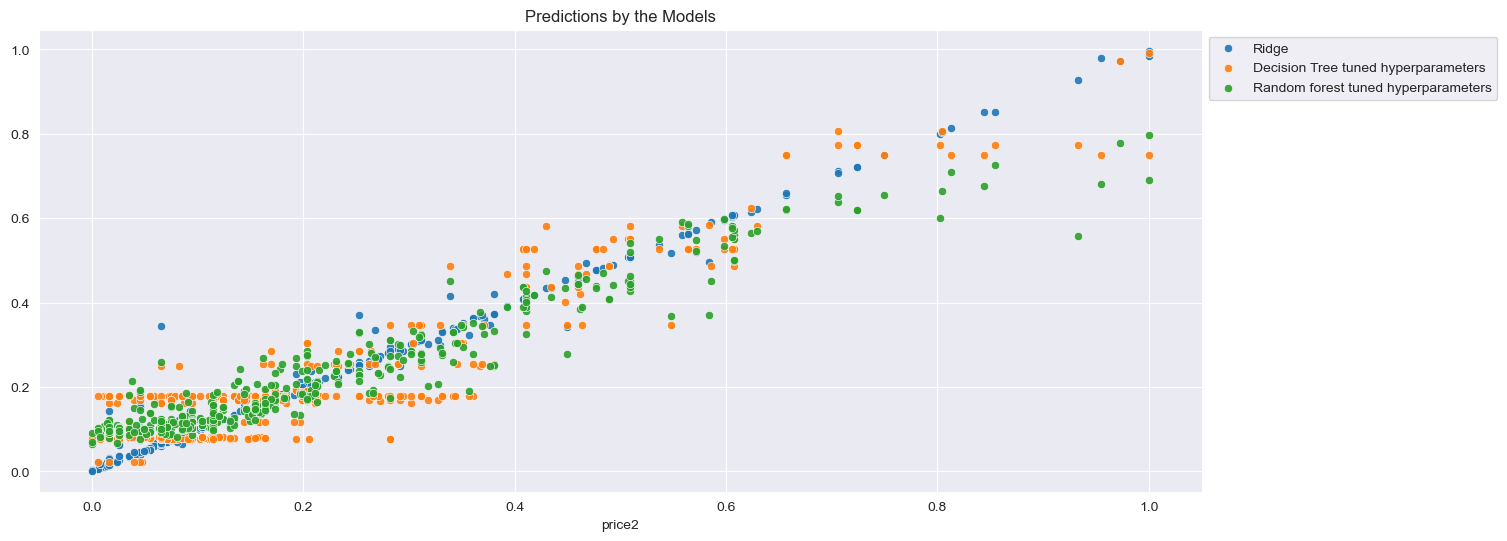

In [177]:
# Plot the predictions and realized values of the best versions of Ridge, DT, and RF. Do you see anything interesting? (for example, play close attention to the DT. What is happening?)
fig, axs = plt.subplots(figsize=(15,6))
sns.scatterplot(y = rf_prices,  x = label_test, label = r'Ridge', alpha = 0.9)
sns.scatterplot(y = dtree_prices2, x = label_test, label = r'Decision Tree tuned hyperparameters', alpha = 0.9)
sns.scatterplot(y = rf_prices2 , x = label_test, label = r'Random forest tuned hyperparameters', alpha = 0.9)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))
plt.title ("Predictions by the Models")
plt.show()
fig.savefig(Figures + 'Predictions_1.png', bbox_inches='tight')


# Explanation for the graph 
We can see that the Decision Tree shows no sepcific trend and the values are more scattered as opposed to the previous graph. Ridge still shows the same trend which is upwards sloping and random forest also is scattered but does does an upwards sloping tredn. Again the values are highly clustered near the origin. 

## 9.3.4. Training the models (Classification models)

We'll finish this problem set looking at classification. Specifically, we'll train and test a DecisionTreeClassifier and a RandomForestClassifier, both the default option and the "best" option, and compare there predictions. The object of interest is whether or not a listing has a price above the mean price in its market/cluster.

In [178]:
label_train_class = train_df['above_mean']
label_test_class= test_df['above_mean']

In [179]:
# Define the problems and train the models 
dt_class = DecisionTreeClassifier(random_state = 10) 
rf_class = RandomForestClassifier(random_state = 10)

In [180]:
dt_class.fit(features_train,label_train_class)
rf_class.fit(features_train,label_train_class)

RandomForestClassifier(random_state=10)

## 9.3.5. Prediction on test data

In [181]:
# Use the trained models to predict the label of the test data
dt_pred=dt_class.predict(features_test)
rf_pred=rf_class.predict(features_test)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

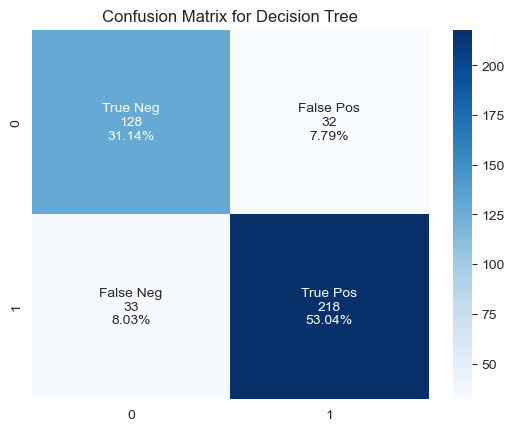

In [186]:
# Computing the confusion matrix of the decision tree classifier
CF_DT = confusion_matrix(label_test_class, dt_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                CF_DT.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     CF_DT.flatten()/np.sum(CF_DT)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
DT = sns.heatmap(CF_DT, annot=labels, cmap = "Blues", fmt = '')
DT.set_title("Confusion Matrix for Decision Tree")

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

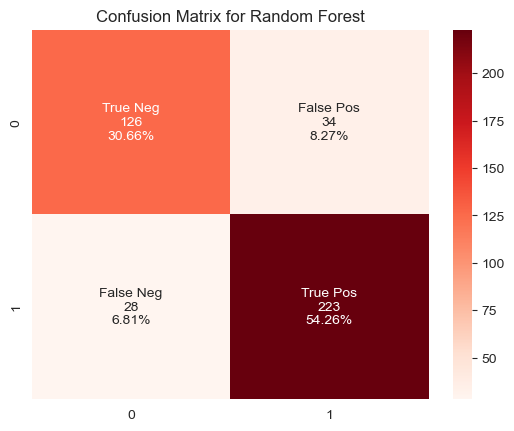

In [207]:
# Compute the confusion matrix of the random forests classifier
CF_RF = confusion_matrix(label_test_class, rf_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                CF_RF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     CF_RF.flatten()/np.sum(CF_RF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
DT = sns.heatmap(CF_RF, annot=labels, cmap = "Reds", fmt = '')
DT.set_title("Confusion Matrix for Random Forest")

In [187]:
# Compute and print the precision, recall and F1 of the Decision Tree Classifier and Random Forests Classifier 
print('Precision score DTC: ', precision_score(label_test_class,  dt_pred),'Precision score RFC: ', precision_score(label_test_class,  rf_pred))
print('Recall score DTC: ', recall_score(label_test_class, dt_pred),'Recall score RFC: ', recall_score(label_test_class,  rf_pred))
print('F1 score DTC: ', f1_score(label_test_class, dt_pred),'F1 score RFC: ', f1_score(label_test_class, rf_pred))      

Precision score DTC:  0.872 Precision score RFC:  0.867704280155642
Recall score DTC:  0.8685258964143426 Recall score RFC:  0.8884462151394422
F1 score DTC:  0.8702594810379242 F1 score RFC:  0.8779527559055117


Let's now find the "best" version of these models.

## 9.3.6 Finding the best version of the models

In [188]:
# Number of trees in decision tree classifier
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(start = 5, stop = 7, num = 3)]

# This is for random forests
n_estimators = [int(x) for x in np.linspace(start = 900, stop = 1100, num = 3)]


dt_grid = {'max_features': max_features, 'max_depth':max_depth}
rf_grid = {'max_features': max_features, 'n_estimators': n_estimators, 'max_depth':max_depth}

We'll need to transform the labels from boolean to numeric.

In [189]:
# This only works if the variables have the same names I use here. Adapt to your setting.

dep_train_cl2 = np.where(label_test_class == True, 1, 0)
dep_test_cl2 = np.where(label_test_class == True, 1, 0)

In [190]:
dtree_class_best = DecisionTreeClassifier()
rf_class_best = RandomForestClassifier()

In [191]:
# Set up the grid search problem for the DTC and RFC and train the model. Then recover the MSE, its standard error, and best hyperparameter configuration.
grid_search_dtC = GridSearchCV(dtree_class_best, dt_grid, cv =10, scoring = 'neg_mean_squared_error')
grid_search_rfC = GridSearchCV(rf_class_best, rf_grid, cv =10, scoring = 'neg_mean_squared_error')


In [192]:
grid_search_dtC

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': ['sqrt']},
             scoring='neg_mean_squared_error')

In [193]:
grid_search_rfC

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': ['sqrt'],
                         'n_estimators': [900, 1000, 1100]},
             scoring='neg_mean_squared_error')

In [194]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters. 
results_best_DTC = grid_search_dtC.fit(features_test,label_test_class)
# summarize
print('MSE: %.3f' % np.std(results_best_DTC.best_score_))
print('Config: %s' % results_best_DTC.best_params_)

MSE: 0.000
Config: {'max_depth': 6, 'max_features': 'sqrt'}


In [195]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters. 
results_best_RFC = grid_search_rfC.fit(features_test,label_test_class)
# summarize
print('MSE: %.3f' % np.std(results_best_RFC.best_score_))
print('Config: %s' % results_best_RFC.best_params_)

MSE: 0.000
Config: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 1100}


In [196]:
# Once you have the best configuration, redefine the DTC and RFC and re-train the model. Once the best models are trained, predict the label using the test data.
dt_class = DecisionTreeClassifier(max_depth = 5, max_features = 'sqrt')
dt_class.fit(features_test,label_test_class)
rf_class = RandomForestClassifier(max_depth = 7, max_features = 'sqrt', n_estimators = 900)
rf_class.fit(features_test,label_test_class)

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=900)

In [197]:
dt_class_pred = dt_class.predict(features_test)
rf_class_pred = rf_class.predict(features_test)

In [198]:
# Compute and print the precision, recall and F1 of the *best* Decision Tree Classifier and Random Forests Classifier 
print('Precision score DTC: ', precision_score(label_test_class,  dt_class_pred),'Precision score RFC: ', precision_score(label_test_class,  rf_class_pred))
print('Recall score DTC: ', recall_score(label_test_class, dt_class_pred),'Recall score RFC: ', recall_score(label_test_class,  rf_class_pred))
print('F1 score DTC: ', f1_score(label_test_class, dt_class_pred),'F1 score RFC: ', f1_score(label_test_class, rf_class_pred))   

Precision score DTC:  0.8381294964028777 Precision score RFC:  0.9571984435797666
Recall score DTC:  0.9282868525896414 Recall score RFC:  0.9800796812749004
F1 score DTC:  0.8809073724007561 F1 score RFC:  0.968503937007874


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree (Predicted)')

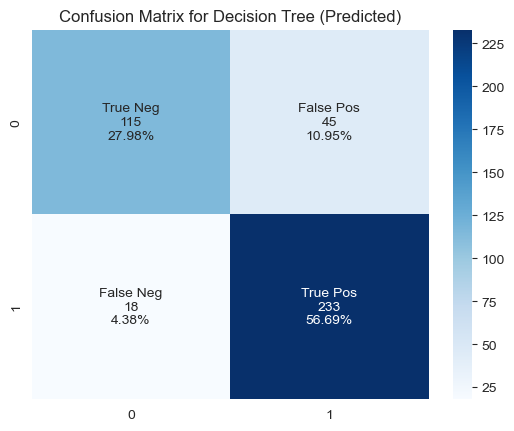

In [199]:
# Compute the confusion matrix of each model
CF_DT_pred = confusion_matrix(label_test_class, dt_class_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                CF_DT_pred.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     CF_DT_pred.flatten()/np.sum(CF_DT_pred)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
DT_pred = sns.heatmap(CF_DT_pred, annot=labels, cmap = "Blues", fmt = '')
DT_pred.set_title("Confusion Matrix for Decision Tree (Predicted)")

Text(0.5, 1.0, 'Confusion Matrix for Random Forest (Predicted)')

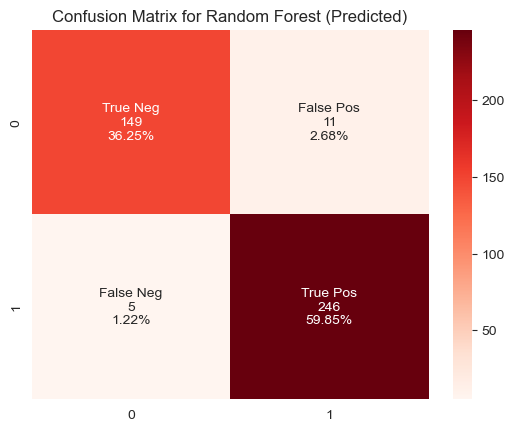

In [200]:
CF_RF_pred = confusion_matrix(label_test_class, rf_class_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                CF_RF_pred.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     CF_RF_pred.flatten()/np.sum(CF_RF_pred)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
RF_pred = sns.heatmap(CF_RF_pred, annot=labels, cmap = "Reds", fmt = '')
RF_pred.set_title("Confusion Matrix for Random Forest (Predicted)")

## 10. Save the `train` and `test` data, as well as `df6` and `df10`.

In [201]:
df6.to_csv(ProcessedData + 'df6.csv')
df10.to_csv (ProcessedData + 'df10.csv')
train_df.to_csv (ProcessedData + 'train_df.csv')
test_df.to_csv (ProcessedData + 'test_df.csv')